In [1]:
#import necessary modules
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
%matplotlib inline

In [2]:
import random
file = 'C:/Users/mdubo/all_accelerometer_data_pids_13.csv'
random.seed(42)
np.random.seed(42)
# p = 0.001
# df_rand = pd.read_csv(file, skiprows=lambda i: i>0 and random.random() > p, low_memory=False)
# df_rand.head()

In [3]:
#load main part of file
df = pd.read_csv(file)
df.head()

time     pid       x       y       z
0              0  JB3156  0.0000  0.0000  0.0000
1              0  CC6740  0.0000  0.0000  0.0000
2  1493733882409  SA0297  0.0758  0.0273 -0.0102
3  1493733882455  SA0297 -0.0359  0.0794  0.0037
4  1493733882500  SA0297 -0.2427 -0.0861 -0.0163

In [4]:
df = df.iloc[2:].copy()
df.reset_index(inplace=True, drop=True)
df['datetime'] = pd.to_datetime(df['time'], unit='ms')
df.head()

time     pid       x       y       z                datetime
0  1493733882409  SA0297  0.0758  0.0273 -0.0102 2017-05-02 14:04:42.409
1  1493733882455  SA0297 -0.0359  0.0794  0.0037 2017-05-02 14:04:42.455
2  1493733882500  SA0297 -0.2427 -0.0861 -0.0163 2017-05-02 14:04:42.500
3  1493733883945  SA0297 -0.2888  0.0514 -0.0145 2017-05-02 14:04:43.945
4  1493733883953  SA0297 -0.0413 -0.0184 -0.0105 2017-05-02 14:04:43.953

In [5]:
file2 = 'C:/Users/mdubo/df_accel_clean.csv'

try:
    df = pd.read_csv(file2)
    
except:
    df.to_csv(file2, index=False)
    
df.head()

time     pid       x       y       z                 datetime
0  1493733882409  SA0297  0.0758  0.0273 -0.0102  2017-05-02 14:04:42.409
1  1493733882455  SA0297 -0.0359  0.0794  0.0037  2017-05-02 14:04:42.455
2  1493733882500  SA0297 -0.2427 -0.0861 -0.0163  2017-05-02 14:04:42.500
3  1493733883945  SA0297 -0.2888  0.0514 -0.0145  2017-05-02 14:04:43.945
4  1493733883953  SA0297 -0.0413 -0.0184 -0.0105  2017-05-02 14:04:43.953

In [6]:
# alternate file load for checking 10% of data
# df_list = []
# for pid in set(df.pid.values):
#     df_slice = df[df['pid'] == pid]
#     #take the first 10% of values
#     df_slice = df_slice[:int(df_slice.shape[0]*.1)]
#     df_list.append(df_slice)
    
# df_10_percent = pd.concat(df_list)

In [7]:
clean_tac = 'clean_tac/{}_clean_TAC.csv'
df_list = []

for pid in set(df['pid'].values):
    df = pd.read_csv(clean_tac.format(pid))
    df['pid'] = list(np.tile(pid, len(df)))
    #df['label'] = np.where(df['TAC_Reading'] >= 0.08, 'Drunk', 'Sober')
    df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
    df_list.append(df)
    
df_tacs = pd.concat(df_list)

In [8]:
df_tacs[df_tacs.pid == 'BK7610'].describe(include='all')

timestamp  TAC_Reading     pid             datetime
count   5.700000e+01    57.000000      57                   57
unique           NaN          NaN       1                   57
top              NaN          NaN  BK7610  2017-05-02 22:18:17
freq             NaN          NaN      57                    1
first            NaN          NaN     NaN  2017-05-02 09:51:54
last             NaN          NaN     NaN  2017-05-03 10:38:19
mean    1.493758e+09     0.041313     NaN                  NaN
std     2.841595e+04     0.050705     NaN                  NaN
min     1.493719e+09    -0.002732     NaN                  NaN
25%     1.493729e+09     0.000744     NaN                  NaN
50%     1.493756e+09     0.012099     NaN                  NaN
75%     1.493782e+09     0.074544     NaN                  NaN
max     1.493808e+09     0.171758     NaN                  NaN

In [9]:
df_tacs[df_tacs.pid == 'BU4707'].describe(include='all')

timestamp  TAC_Reading     pid             datetime
count   5.700000e+01    57.000000      57                   57
unique           NaN          NaN       1                   57
top              NaN          NaN  BU4707  2017-05-02 22:18:17
freq             NaN          NaN      57                    1
first            NaN          NaN     NaN  2017-05-02 09:51:54
last             NaN          NaN     NaN  2017-05-03 10:38:19
mean    1.493758e+09     0.041313     NaN                  NaN
std     2.841595e+04     0.050705     NaN                  NaN
min     1.493719e+09    -0.002732     NaN                  NaN
25%     1.493729e+09     0.000744     NaN                  NaN
50%     1.493756e+09     0.012099     NaN                  NaN
75%     1.493782e+09     0.074544     NaN                  NaN
max     1.493808e+09     0.171758     NaN                  NaN

In [10]:
# tac data is repetitive for two participants
df_tacs = df_tacs[df_tacs.pid != 'BK7610']

In [11]:
df_tacs.head()

timestamp  TAC_Reading     pid            datetime
0  1493717859     0.000043  PC6771 2017-05-02 09:37:39
1  1493720213     0.003820  PC6771 2017-05-02 10:16:53
2  1493720624     0.004772  PC6771 2017-05-02 10:23:44
3  1493721057     0.002101  PC6771 2017-05-02 10:30:57
4  1493721363    -0.002334  PC6771 2017-05-02 10:36:03

In [12]:
df = pd.read_csv(file2)
df.head()

time     pid       x       y       z                 datetime
0  1493733882409  SA0297  0.0758  0.0273 -0.0102  2017-05-02 14:04:42.409
1  1493733882455  SA0297 -0.0359  0.0794  0.0037  2017-05-02 14:04:42.455
2  1493733882500  SA0297 -0.2427 -0.0861 -0.0163  2017-05-02 14:04:42.500
3  1493733883945  SA0297 -0.2888  0.0514 -0.0145  2017-05-02 14:04:43.945
4  1493733883953  SA0297 -0.0413 -0.0184 -0.0105  2017-05-02 14:04:43.953

In [13]:
def triple_variance_calculator(df_tacs, df_acc, pid, delta1=timedelta(minutes=30), delta2=timedelta(minutes=10)):
    df1 = df_tacs[df_tacs.pid == pid].copy()
    df2 = df_acc[df_acc.pid == pid].copy()
    
    start = max(df1['datetime'].min() + delta1, df2['datetime'].min()) + delta1
    end = df1['datetime'].max()
    tac_window = start
    
    X = []
    t = []
    y = []
    
    while tac_window <= end:
    
        accel_window = tac_window
        mask1 = (df1['datetime'] >= tac_window - delta1) & (df1['datetime'] < tac_window)
        mask2 = (df2['datetime'] >= accel_window) & (df2['datetime'] < accel_window + delta2)
        
#         for i in range(accel_window, accel_window + (delta2*3), delta2):
#             X.append(df2[mask2][['x', 'y', 'z']].std())
#             t.append(accel_window)
#             accel_window += delta2
        
        X.append(df2[mask2][['x', 'y', 'z']].std())
        t.append(accel_window)
        accel_window += delta2
        
        X.append(df2[mask2][['x', 'y', 'z']].std())
        t.append(accel_window)
        accel_window += delta2
        
        X.append(df2[mask2][['x', 'y', 'z']].std())
        t.append(accel_window)
        accel_window += delta2
        
        y.append(df1[mask1]['TAC_Reading'].mean())
        tac_window += delta1
        
    df_x = pd.DataFrame(X, index=t)
    df_x = df_x.rename(columns={'x':'x_variance', 'y':'y_variance', 'z':'z_variance'})
    df_x["datetime"] = t
    df_x['TAC_Reading'] = np.repeat(y, 3)
    df_x = df_x.dropna()
    df_x['pid'] = pid
    df_x['drunk'] = np.where(df_x['TAC_Reading'] >= 0.08, 1, 0)
    df_x['var'] = np.sqrt(df_x['x_variance']**2 + df_x['y_variance']**2 + df_x['z_variance']**2)
    return df_x

In [14]:
df['datetime'] = pd.to_datetime(df['time'], unit='ms')
df.head()

time     pid       x       y       z                datetime
0  1493733882409  SA0297  0.0758  0.0273 -0.0102 2017-05-02 14:04:42.409
1  1493733882455  SA0297 -0.0359  0.0794  0.0037 2017-05-02 14:04:42.455
2  1493733882500  SA0297 -0.2427 -0.0861 -0.0163 2017-05-02 14:04:42.500
3  1493733883945  SA0297 -0.2888  0.0514 -0.0145 2017-05-02 14:04:43.945
4  1493733883953  SA0297 -0.0413 -0.0184 -0.0105 2017-05-02 14:04:43.953

In [15]:
df_check = triple_variance_calculator(df_tacs, df, 'SA0297')
df_check.head()

x_variance  y_variance  z_variance  \
2017-05-02 17:04:42.409    0.038231    0.057885    0.064458   
2017-05-02 17:14:42.409    0.038231    0.057885    0.064458   
2017-05-02 17:24:42.409    0.038231    0.057885    0.064458   
2017-05-02 17:34:42.409    0.092856    0.080349    0.075062   
2017-05-02 17:44:42.409    0.092856    0.080349    0.075062   

                                       datetime  TAC_Reading     pid  drunk  \
2017-05-02 17:04:42.409 2017-05-02 17:04:42.409     0.111503  SA0297      1   
2017-05-02 17:14:42.409 2017-05-02 17:14:42.409     0.111503  SA0297      1   
2017-05-02 17:24:42.409 2017-05-02 17:24:42.409     0.111503  SA0297      1   
2017-05-02 17:34:42.409 2017-05-02 17:34:42.409     0.160592  SA0297      1   
2017-05-02 17:44:42.409 2017-05-02 17:44:42.409     0.160592  SA0297      1   

                              var  
2017-05-02 17:04:42.409  0.094695  
2017-05-02 17:14:42.409  0.094695  
2017-05-02 17:24:42.409  0.094695  
2017-05-02 17:34:42.409  0.143918  
2017-05-02 17:44:42.409  0.143918

In [16]:
df_check.describe(include='all')

x_variance  y_variance  z_variance                    datetime  \
count    60.000000   60.000000   60.000000                          60   
unique         NaN         NaN         NaN                          60   
top            NaN         NaN         NaN  2017-05-03 07:54:42.409000   
freq           NaN         NaN         NaN                           1   
first          NaN         NaN         NaN  2017-05-02 17:04:42.409000   
last           NaN         NaN         NaN  2017-05-03 10:24:42.409000   
mean      0.075822    0.070710    0.070459                         NaN   
std       0.078270    0.066807    0.066854                         NaN   
min       0.000932    0.000967    0.001036                         NaN   
25%       0.001075    0.001180    0.001184                         NaN   
50%       0.059974    0.064163    0.066682                         NaN   
75%       0.114704    0.124899    0.123181                         NaN   
max       0.280610    0.195953    0.226822                         NaN   

        TAC_Reading     pid      drunk        var  
count     60.000000      60  60.000000  60.000000  
unique          NaN       1        NaN        NaN  
top             NaN  SA0297        NaN        NaN  
freq            NaN      60        NaN        NaN  
first           NaN     NaN        NaN        NaN  
last            NaN     NaN        NaN        NaN  
mean       0.062880     NaN   0.300000   0.125954  
std        0.058819     NaN   0.462125   0.122086  
min       -0.004768     NaN   0.000000   0.001734  
25%        0.009703     NaN   0.000000   0.001980  
50%        0.055086     NaN   0.000000   0.108554  
75%        0.112377     NaN   1.000000   0.205100  
max        0.182644     NaN   1.000000   0.410594

In [17]:
def triple_participant_compiler(df_tacs, df_accel):
    df_list = []
    for pid in set(df_tacs['pid'].values):
        new_df = triple_variance_calculator(df_tacs, df_accel, pid)
        df_list.append(new_df)
    df = pd.concat(df_list)    
    return df

In [18]:
df_triple = triple_participant_compiler(df_tacs, df)
df_triple.head()

x_variance  y_variance  z_variance  \
2017-05-02 14:58:08.409    0.052850    0.046527    0.081419   
2017-05-02 15:08:08.409    0.052850    0.046527    0.081419   
2017-05-02 15:18:08.409    0.052850    0.046527    0.081419   
2017-05-02 15:28:08.409    0.106928    0.093697    0.106555   
2017-05-02 15:38:08.409    0.106928    0.093697    0.106555   

                                       datetime  TAC_Reading     pid  drunk  \
2017-05-02 14:58:08.409 2017-05-02 14:58:08.409     0.069712  PC6771      0   
2017-05-02 15:08:08.409 2017-05-02 15:08:08.409     0.069712  PC6771      0   
2017-05-02 15:18:08.409 2017-05-02 15:18:08.409     0.069712  PC6771      0   
2017-05-02 15:28:08.409 2017-05-02 15:28:08.409     0.074726  PC6771      0   
2017-05-02 15:38:08.409 2017-05-02 15:38:08.409     0.074726  PC6771      0   

                              var  
2017-05-02 14:58:08.409  0.107643  
2017-05-02 15:08:08.409  0.107643  
2017-05-02 15:18:08.409  0.107643  
2017-05-02 15:28:08.409  0.177670  
2017-05-02 15:38:08.409  0.177670

In [19]:
df_triple.describe(include='all')

x_variance    y_variance    z_variance                    datetime  \
count   534.000000  5.340000e+02  5.340000e+02                         534   
unique         NaN           NaN           NaN                         534   
top            NaN           NaN           NaN  2017-05-03 04:06:20.198000   
freq           NaN           NaN           NaN                           1   
first          NaN           NaN           NaN  2017-05-02 14:58:08.409000   
last           NaN           NaN           NaN  2017-05-03 11:16:20.198000   
mean      0.507768  9.635444e+05  9.635447e+05                         NaN   
std       0.955636  9.048016e+06  9.048015e+06                         NaN   
min       0.000504  0.000000e+00  6.855082e-04                         NaN   
25%       0.019487  1.579437e-02  2.380544e-02                         NaN   
50%       0.090052  9.208313e-02  9.573131e-02                         NaN   
75%       0.376960  3.462339e-01  3.749155e-01                         NaN   
max       4.960718  8.681507e+07  8.681506e+07                         NaN   

        TAC_Reading     pid       drunk           var  
count    534.000000     534  534.000000  5.340000e+02  
unique          NaN      12         NaN           NaN  
top             NaN  CC6740         NaN           NaN  
freq            NaN     105         NaN           NaN  
first           NaN     NaN         NaN           NaN  
last            NaN     NaN         NaN           NaN  
mean       0.068019     NaN    0.314607  1.362658e+06  
std        0.060354     NaN    0.464794  1.279583e+07  
min       -0.004768     NaN    0.000000  1.345159e-03  
25%        0.016433     NaN    0.000000  3.814873e-02  
50%        0.058003     NaN    0.000000  1.523315e-01  
75%        0.091390     NaN    1.000000  7.164334e-01  
max        0.244715     NaN    1.000000  1.227750e+08

In [20]:
df = df_triple

In [21]:
drunk = df[df.drunk == 1]
sober = df[df.drunk == 0]
print('Mean sober variance is {}'.format(sober['var'].mean()))
print('Mean drunk variance is {}'.format(drunk['var'].mean()))

Mean sober variance is 1988139.6493911727
Mean drunk variance is 1.331954399802274


In [22]:
# examine class imbalance
df.drunk.mean()

0.3146067415730337

Text(0.5, 1.0, 'Sober Walk')

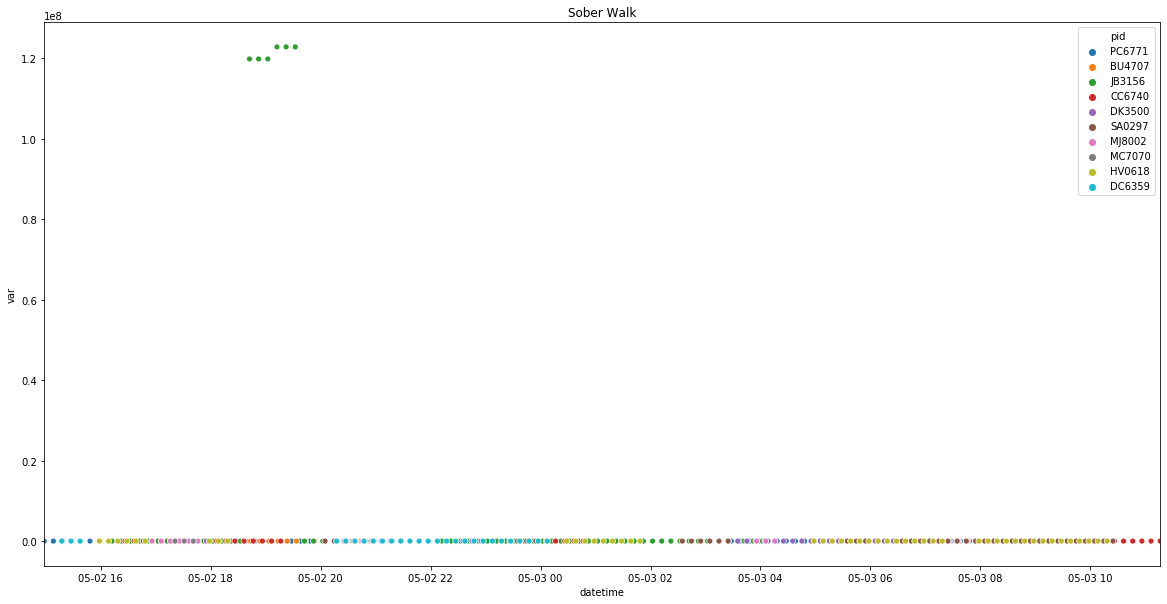

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
ax1 = sns.scatterplot('datetime', 'var', hue='pid', data=sober).set_title('Sober Walk')
plt.xlim(sober['datetime'].min(), sober['datetime'].max())
ax1

Text(0.5, 1.0, 'Drunk Walk')

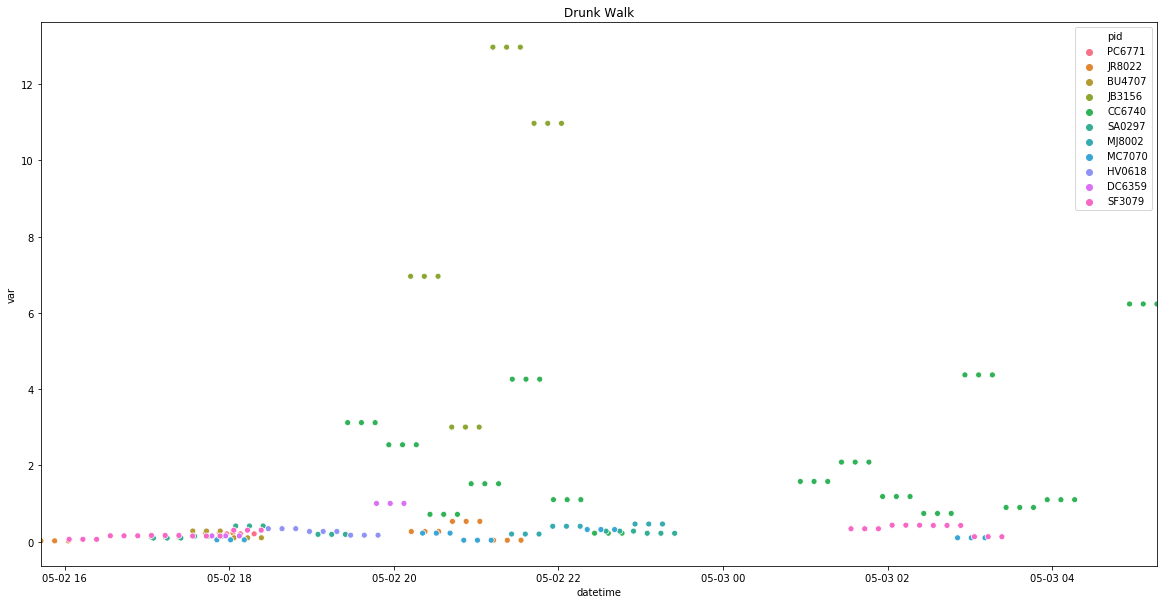

In [24]:
plt.figure(figsize=(20,10))
ax2 = sns.scatterplot('datetime', 'var', hue='pid', data=drunk).set_title('Drunk Walk')
plt.xlim(drunk['datetime'].min(), drunk['datetime'].max())
ax2

In [25]:
df_exclude = df[df.pid != 'JB3156']
drunk2 = df_exclude[df_exclude.drunk == 1]
sober2 = df_exclude[df_exclude.drunk == 0]

Text(0.5, 1.0, 'Sober Walk')

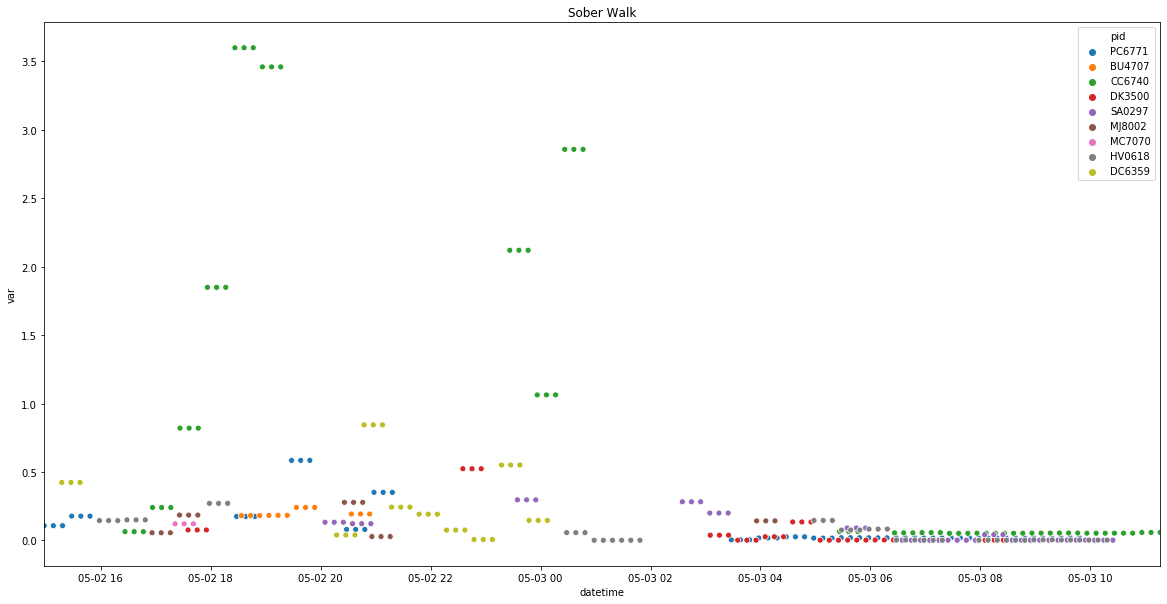

In [26]:
plt.figure(figsize=(20, 10))
ax1 = sns.scatterplot('datetime', 'var', hue='pid', data=sober2).set_title('Sober Walk')
plt.xlim(sober2['datetime'].min(), sober2['datetime'].max())
ax1

Text(0.5, 1.0, 'Drunk Walk')

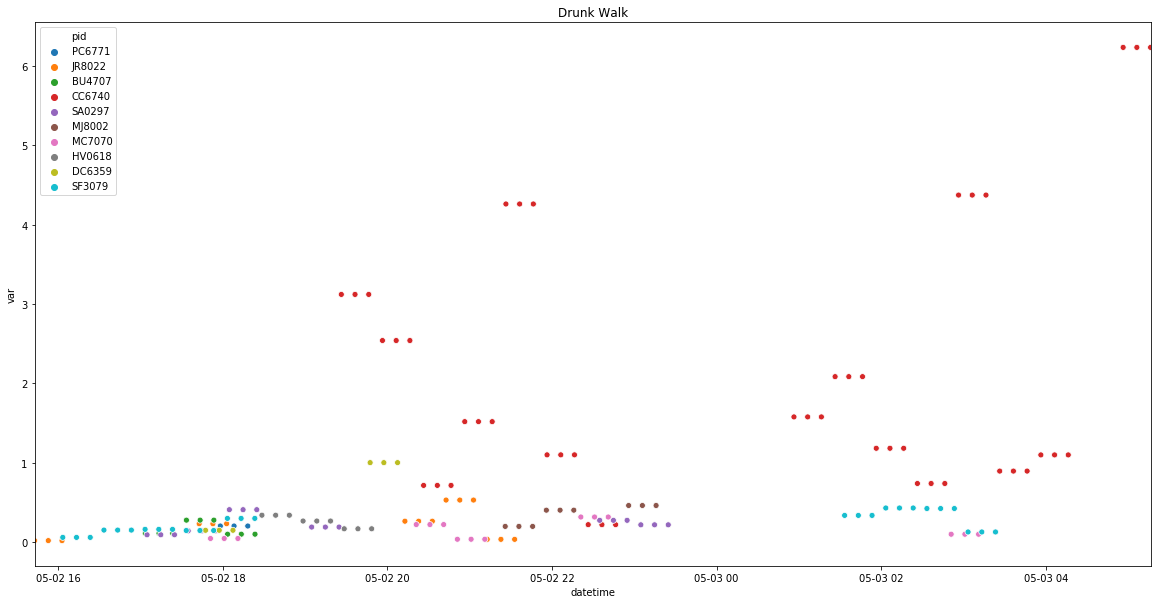

In [27]:
plt.figure(figsize=(20, 10))
ax2 = sns.scatterplot('datetime', 'var', hue='pid', data=drunk2).set_title('Drunk Walk')
plt.xlim(drunk2['datetime'].min(), drunk2['datetime'].max())
ax2

Text(0.5, 1.0, 'Participant SA0297')

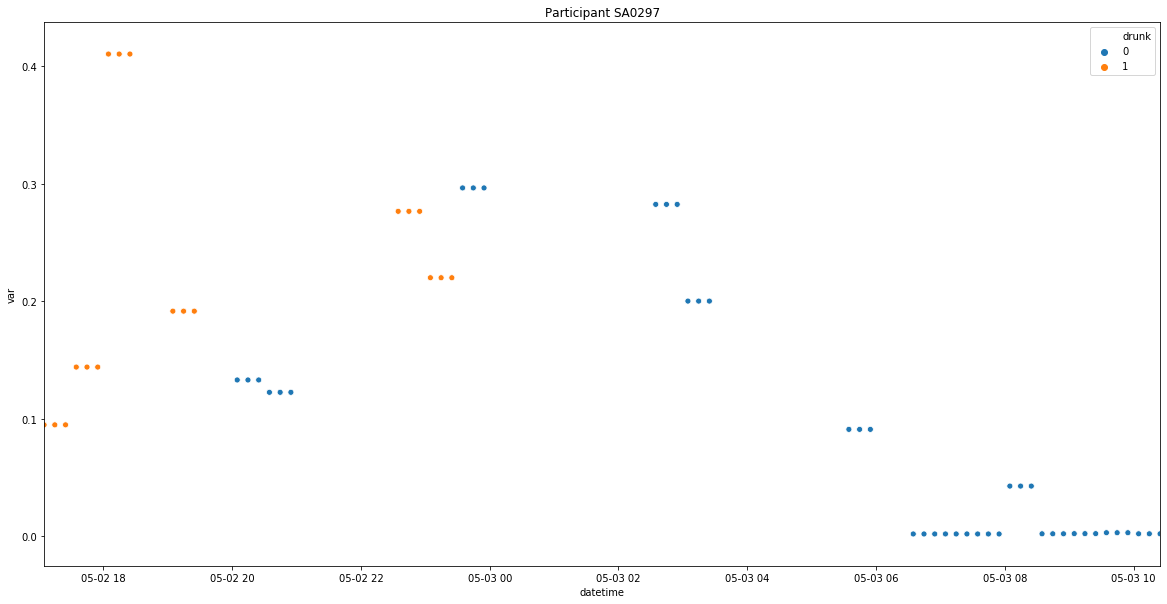

In [28]:
df_sa = df[df.pid == 'SA0297']
plt.figure(figsize=(20, 10))
ax1 = sns.scatterplot('datetime', 'var', hue='drunk', data=df_sa).set_title('Participant SA0297')
plt.xlim(df_sa['datetime'].min(), df_sa['datetime'].max())
ax1

In [29]:
df_original = pd.read_csv(file)
df_original.describe(include='all')

time       pid             x             y             z
count   1.405757e+07  14057567  1.405757e+07  1.405757e+07  1.405757e+07
unique           NaN        13           NaN           NaN           NaN
top              NaN    CC6740           NaN           NaN           NaN
freq             NaN   2374695           NaN           NaN           NaN
mean    1.493778e+12       NaN -9.269848e-03 -7.168398e+06  7.168398e+06
std     5.640453e+08       NaN  9.540696e-01  3.528998e+07  3.528998e+07
min     0.000000e+00       NaN -4.333507e+01 -1.809008e+08 -4.902300e+01
25%     1.493755e+12       NaN -5.700000e-03 -4.500000e-03 -4.200000e-03
50%     1.493779e+12       NaN -2.000000e-04 -2.000000e-04  6.100000e-03
75%     1.493801e+12       NaN  7.600000e-03  4.500000e-03  4.605889e-02
max     1.493829e+12       NaN  3.922540e+01  2.731123e+01  1.809008e+08

Text(0.5, 1.0, 'Participant SA0297, y vs z')

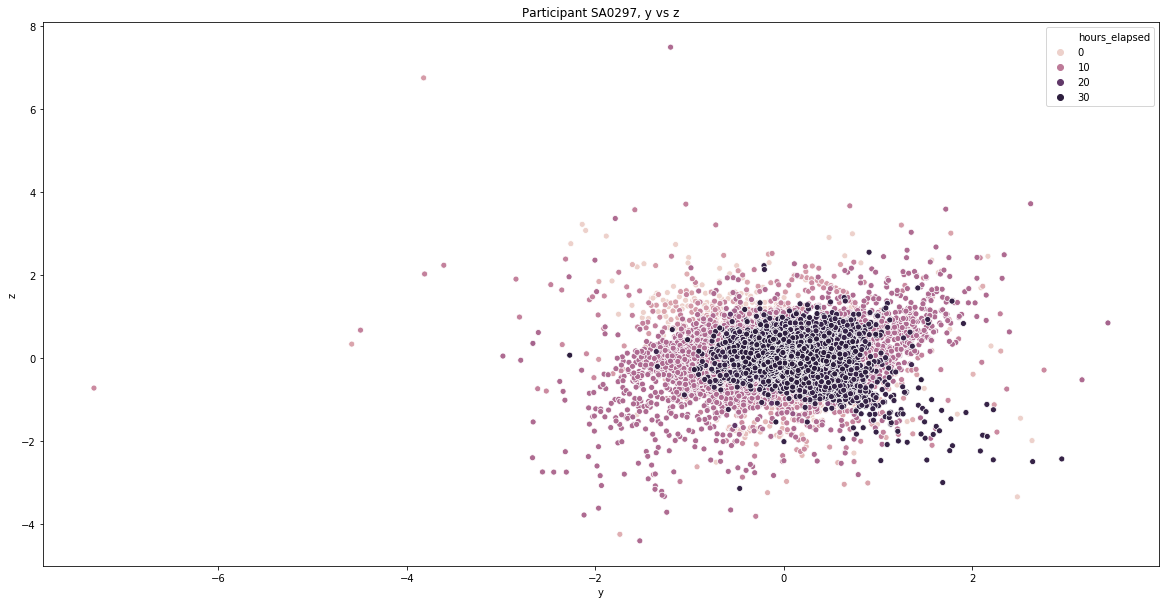

In [212]:
# hypothesis is that x is vertical axis
# plot of y vs z should look like overhead view of movement
df_orig_sa = df_original[df_original.pid == 'SA0297'].copy()
df_orig_sa['datetime'] = pd.to_datetime(df_orig_sa.time, unit='ms')
df_orig_sa['time_elapsed'] = df_orig_sa['datetime'] - df_orig_sa['datetime'].min()
df_orig_sa['hours_elapsed'] = df_orig_sa['time_elapsed'] // np.timedelta64(1, 'h')
plt.figure(figsize=(20, 10))
ax1 = sns.scatterplot('y', 'z', hue='hours_elapsed', data=df_orig_sa).set_title('Participant SA0297, y vs z')
ax1

In [31]:
# tried animation; took too long to run
# import matplotlib.animation as animation

# x = df_orig_sa['y']
# y = df_orig_sa['z']

# fig, ax = plt.subplots()
# line, = ax.plot(x, y, color='k')

# def update(num, x, y, line):
#     line.set_data(x[:num], y[:num])
#     line.axes.axis([-8, 4, -6, 8])
#     return line,

# ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
#                               interval=25, blit=True)
# ani.save('test.gif')
# plt.show()


In [209]:
df_orig_sa.head()

time     pid       x       y       z                datetime  \
2  1493733882409  SA0297  0.0758  0.0273 -0.0102 2017-05-02 14:04:42.409   
3  1493733882455  SA0297 -0.0359  0.0794  0.0037 2017-05-02 14:04:42.455   
4  1493733882500  SA0297 -0.2427 -0.0861 -0.0163 2017-05-02 14:04:42.500   
5  1493733883945  SA0297 -0.2888  0.0514 -0.0145 2017-05-02 14:04:43.945   
6  1493733883953  SA0297 -0.0413 -0.0184 -0.0105 2017-05-02 14:04:43.953   

     time_elapsed  hour_elapsed  
2        00:00:00             0  
3 00:00:00.046000             0  
4 00:00:00.091000             0  
5 00:00:01.536000             0  
6 00:00:01.544000             0

In [197]:
df_orig_sa.describe(include='all')

time     pid              x              y              z  \
count   9.629010e+05  962901  962901.000000  962901.000000  962901.000000   
unique           NaN       1            NaN            NaN            NaN   
top              NaN  SA0297            NaN            NaN            NaN   
freq             NaN  962901            NaN            NaN            NaN   
first            NaN     NaN            NaN            NaN            NaN   
last             NaN     NaN            NaN            NaN            NaN   
mean    1.493791e+12     NaN      -0.002821      -0.000486      -0.004184   
std     2.348540e+07     NaN       0.109689       0.105736       0.105106   
min     1.493734e+12     NaN      -5.759300      -7.322200      -4.400100   
25%     1.493769e+12     NaN      -0.001500      -0.001700      -0.006200   
50%     1.493798e+12     NaN      -0.000100      -0.000400      -0.004500   
75%     1.493809e+12     NaN       0.001600       0.000900      -0.002700   
max     1.493825e+12     NaN       4.490900       3.443900       7.496700   

                          datetime  hours_elapsed  
count                       962901  962901.000000  
unique                      962891            NaN  
top     2017-05-02 14:07:28.953000            NaN  
freq                             2            NaN  
first   2017-05-02 14:04:42.409000            NaN  
last    2017-05-03 15:18:55.776000            NaN  
mean                           NaN       9.818493  
std                            NaN       5.759072  
min                            NaN       0.000000  
25%                            NaN       6.000000  
50%                            NaN       9.000000  
75%                            NaN      13.000000  
max                            NaN      21.000000

Text(0.5, 1.0, 'Participant SA0297, x vs y')

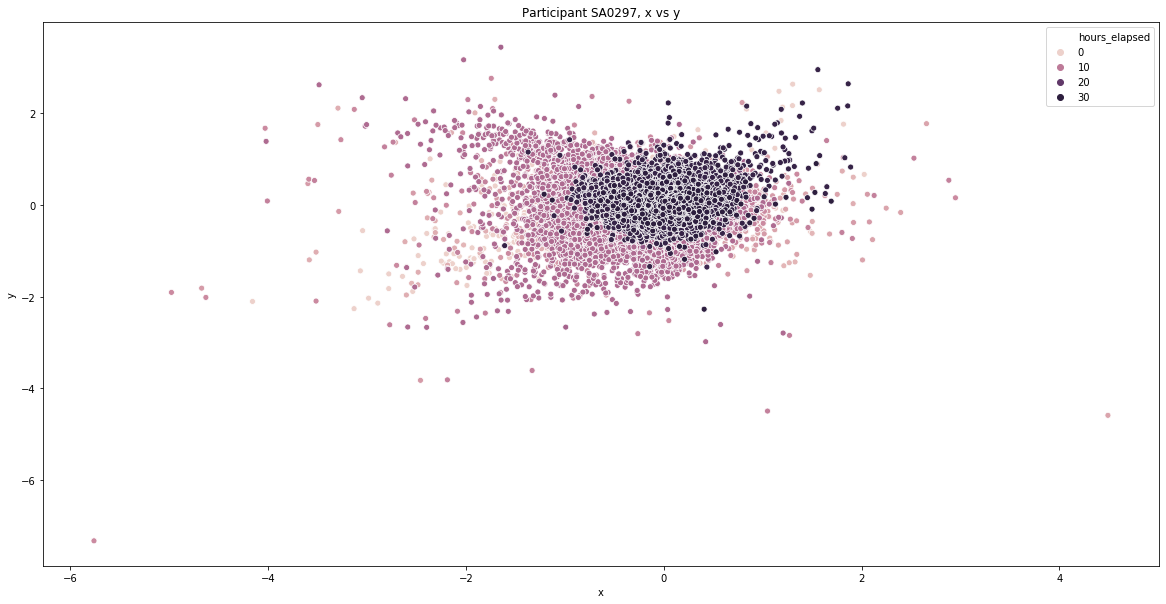

In [213]:
# check other coordinates
plt.figure(figsize=(20, 10))
ax1 = sns.scatterplot('x', 'y', hue='hours_elapsed', data=df_orig_sa).set_title('Participant SA0297, x vs y')
ax1

Text(0.5, 1.0, 'Participant SA0297, x vs z')

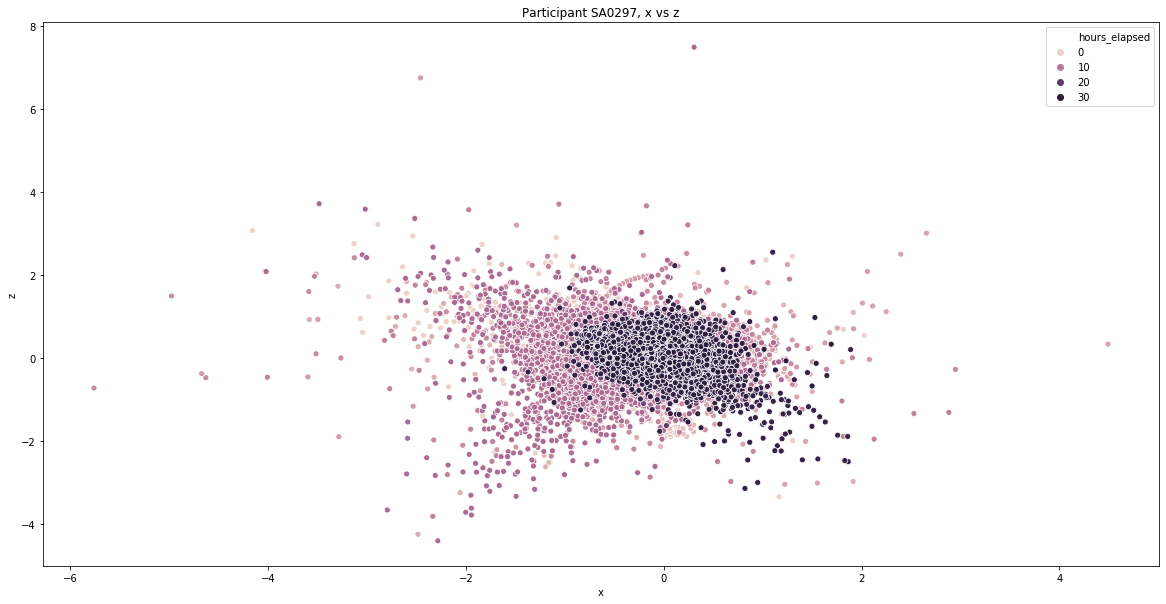

In [214]:
plt.figure(figsize=(20, 10))
ax1 = sns.scatterplot('x', 'z', hue='hours_elapsed', data=df_orig_sa).set_title('Participant SA0297, x vs z')
ax1

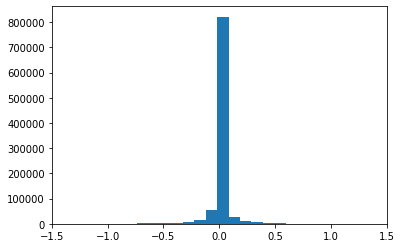

In [35]:
# create histograms of movement
plt.hist(df_orig_sa['x'], bins=100)
plt.xlim(-1.5, 1.5)
plt.show()

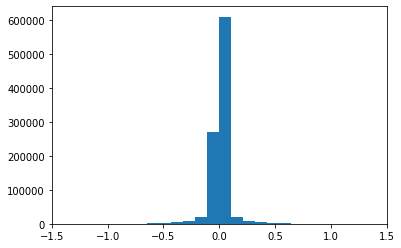

In [36]:
plt.hist(df_orig_sa['y'], bins=100)
plt.xlim(-1.5, 1.5)
plt.show()

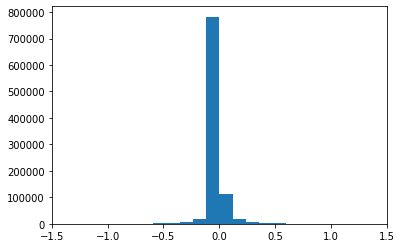

In [37]:
plt.hist(df_orig_sa['z'], bins=100)
plt.xlim(-1.5, 1.5)
plt.show()

In [38]:
# use bootstrapping to test difference between sober and drunk
df_triple_sa = df[df.pid == 'SA0297']
df_triple_sa.head()

x_variance  y_variance  z_variance  \
2017-05-02 17:04:42.409    0.038231    0.057885    0.064458   
2017-05-02 17:14:42.409    0.038231    0.057885    0.064458   
2017-05-02 17:24:42.409    0.038231    0.057885    0.064458   
2017-05-02 17:34:42.409    0.092856    0.080349    0.075062   
2017-05-02 17:44:42.409    0.092856    0.080349    0.075062   

                                       datetime  TAC_Reading     pid  drunk  \
2017-05-02 17:04:42.409 2017-05-02 17:04:42.409     0.111503  SA0297      1   
2017-05-02 17:14:42.409 2017-05-02 17:14:42.409     0.111503  SA0297      1   
2017-05-02 17:24:42.409 2017-05-02 17:24:42.409     0.111503  SA0297      1   
2017-05-02 17:34:42.409 2017-05-02 17:34:42.409     0.160592  SA0297      1   
2017-05-02 17:44:42.409 2017-05-02 17:44:42.409     0.160592  SA0297      1   

                              var  
2017-05-02 17:04:42.409  0.094695  
2017-05-02 17:14:42.409  0.094695  
2017-05-02 17:24:42.409  0.094695  
2017-05-02 17:34:42.409  0.143918  
2017-05-02 17:44:42.409  0.143918

In [39]:
x_var_drunk = df_triple_sa[df_triple_sa.drunk == 1].x_variance
x_var_sober = df_triple_sa[df_triple_sa.drunk == 0].x_variance

mean_x_variance = np.mean(np.concatenate((x_var_drunk, x_var_sober)))
x_var_drunk_shift = x_var_drunk - np.mean(x_var_drunk) + mean_x_variance
x_var_sober_shift = x_var_sober - np.mean(x_var_sober) + mean_x_variance

In [40]:
N_rep = 10000

#create our functions for drawing bootstrap replicates
def bootstrap_replicate_1d(data,func):
    bs_sample = np.random.choice(data,size=len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates   

In [41]:
#Now draw bootstrap replicates
bs_x_drunk_reps = draw_bs_reps(x_var_drunk_shift, np.mean, N_rep)
bs_x_sober_reps = draw_bs_reps(x_var_sober_shift, np.mean, N_rep)
bs_reps_x = bs_x_drunk_reps - bs_x_sober_reps

In [42]:
#Calculate observed difference in means and compare to bs_reps to find p
obs_diff_mean_x = np.mean(x_var_drunk) - np.mean(x_var_sober)
p_x = np.sum(bs_reps_x >= obs_diff_mean_x) / len(bs_reps_x)
print('The p-value of the observed difference between groups is {}'.format(p_x))

The p-value of the observed difference between groups is 0.0


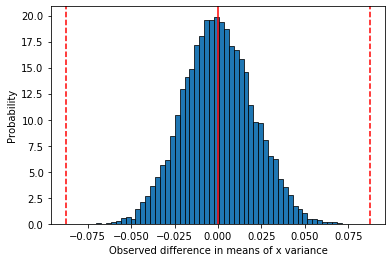

In [43]:
_ = plt.hist(bs_reps_x, edgecolor='black', linewidth = 0.75, bins = 50, density=True)
_ = plt.xlabel('Observed difference in means of x variance')
_ = plt.ylabel('Probability')
_ = plt.axvline(bs_reps_x.mean(), color='r')
_ = plt.axvline(obs_diff_mean_x, color='r',linestyle='--')
_ = plt.axvline(-obs_diff_mean_x, color='r',linestyle='--')
plt.show()

In [44]:
# repeat process for y and z variance
y_var_drunk = df_triple_sa[df_triple_sa.drunk == 1].y_variance
y_var_sober = df_triple_sa[df_triple_sa.drunk == 0].y_variance

mean_y_variance = np.mean(np.concatenate((y_var_drunk, y_var_sober)))
y_var_drunk_shift = y_var_drunk - np.mean(y_var_drunk) + mean_y_variance
y_var_sober_shift = y_var_sober - np.mean(y_var_sober) + mean_y_variance

bs_y_drunk_reps = draw_bs_reps(y_var_drunk_shift, np.mean, N_rep)
bs_y_sober_reps = draw_bs_reps(y_var_sober_shift, np.mean, N_rep)
bs_reps_y = bs_y_drunk_reps - bs_y_sober_reps

obs_diff_mean_y = np.mean(y_var_drunk) - np.mean(y_var_sober)
p_y = np.sum(bs_reps_y >= obs_diff_mean_y) / len(bs_reps_y)
print('The p-value of the observed difference between groups is {}'.format(p_y))

The p-value of the observed difference between groups is 0.0


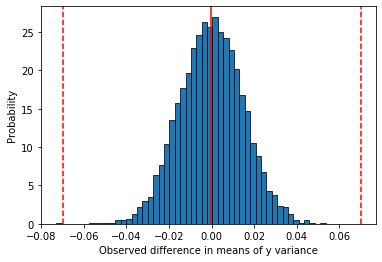

In [45]:
_ = plt.hist(bs_reps_y, edgecolor='black', linewidth = 0.75, bins = 50, density=True)
_ = plt.xlabel('Observed difference in means of y variance')
_ = plt.ylabel('Probability')
_ = plt.axvline(bs_reps_y.mean(), color='r')
_ = plt.axvline(obs_diff_mean_y, color='r',linestyle='--')
_ = plt.axvline(-obs_diff_mean_y, color='r',linestyle='--')
plt.show()

In [46]:
# repeat process for y and z variance
z_var_drunk = df_triple_sa[df_triple_sa.drunk == 1].z_variance
z_var_sober = df_triple_sa[df_triple_sa.drunk == 0].z_variance

mean_z_variance = np.mean(np.concatenate((z_var_drunk, z_var_sober)))
z_var_drunk_shift = z_var_drunk - np.mean(z_var_drunk) + mean_z_variance
z_var_sober_shift = z_var_sober - np.mean(z_var_sober) + mean_z_variance

bs_z_drunk_reps = draw_bs_reps(z_var_drunk_shift, np.mean, N_rep)
bs_z_sober_reps = draw_bs_reps(z_var_sober_shift, np.mean, N_rep)
bs_reps_z = bs_z_drunk_reps - bs_z_sober_reps

obs_diff_mean_z = np.mean(z_var_drunk) - np.mean(z_var_sober)
p_z = np.sum(bs_reps_z >= obs_diff_mean_z) / len(bs_reps_z)
print('The p-value of the observed difference between groups is {}'.format(p_z))

The p-value of the observed difference between groups is 0.0


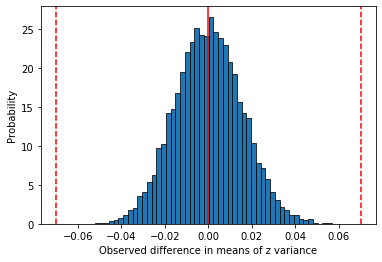

In [47]:
_ = plt.hist(bs_reps_z, edgecolor='black', linewidth = 0.75, bins = 50, density=True)
_ = plt.xlabel('Observed difference in means of z variance')
_ = plt.ylabel('Probability')
_ = plt.axvline(bs_reps_z.mean(), color='r')
_ = plt.axvline(obs_diff_mean_y, color='r',linestyle='--')
_ = plt.axvline(-obs_diff_mean_y, color='r',linestyle='--')
plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [49]:
#retry with splitting on time
target_names = ['drunk']
feature_names = ['x_variance', 'y_variance', 'z_variance']
Xy = df[target_names + feature_names]
Xy = Xy.dropna()
X = Xy[feature_names]
y = Xy[target_names]
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))

0.5900621118012422


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
logreg.score(X_train, y_train)

0.7345844504021448

In [51]:
from sklearn.metrics import f1_score
print(f1_score(y_test, logreg.predict(X_test)))

0.0


In [52]:
# create list of dictionaries for hyperparameter table
dict_list = []
model_1 = {'model_name' : 'Logistic Regression', 
           'features' : 'variance',
           'training_accuracy' : logreg.score(X_train, y_train),
           'test_accuracy' : logreg.score(X_test, y_test),
           'f1_score' : f1_score(y_test, logreg.predict(X_test))}

dict_list.append(model_1)

In [53]:
dict_list

[{'model_name': 'Logistic Regression',
  'features': 'variance',
  'training_accuracy': 0.7345844504021448,
  'test_accuracy': 0.5900621118012422,
  'f1_score': 0.0}]

In [54]:
#try to train model with pid
target = ['drunk']
dummy = ['pid']
feature = ['x_variance', 'y_variance', 'z_variance']
Xy = df[target + feature + dummy]
df_dum = pd.get_dummies(Xy, columns=dummy, drop_first=True)
features = [c for c in df_dum.columns if c not in target]
X = df_dum[features]
y = df_dum[target]
X_train_dummy = X[:int(X.shape[0]*0.7)]
X_test_dummy = X[int(X.shape[0]*0.7):]
y_train_dummy = y[:int(X.shape[0]*0.7)]
y_test_dummy = y[int(X.shape[0]*0.7):]
logreg_dummy = LogisticRegression()
logreg_dummy.fit(X_train_dummy, y_train_dummy)
print(logreg_dummy.score(X_test_dummy, y_test_dummy))

0.5900621118012422


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
Xy.describe(include='all')

drunk  x_variance    y_variance    z_variance     pid
count   534.000000  534.000000  5.340000e+02  5.340000e+02     534
unique         NaN         NaN           NaN           NaN      12
top            NaN         NaN           NaN           NaN  CC6740
freq           NaN         NaN           NaN           NaN     105
mean      0.314607    0.507768  9.635444e+05  9.635447e+05     NaN
std       0.464794    0.955636  9.048016e+06  9.048015e+06     NaN
min       0.000000    0.000504  0.000000e+00  6.855082e-04     NaN
25%       0.000000    0.019487  1.579437e-02  2.380544e-02     NaN
50%       0.000000    0.090052  9.208313e-02  9.573131e-02     NaN
75%       1.000000    0.376960  3.462339e-01  3.749155e-01     NaN
max       1.000000    4.960718  8.681507e+07  8.681506e+07     NaN

In [56]:
from sklearn.metrics import accuracy_score
y_pred_dummy = logreg_dummy.predict(X_test_dummy)
accuracy_score(y_test_dummy, y_pred_dummy)

0.5900621118012422

In [57]:
logreg_dummy.score(X_train_dummy, y_train_dummy)

0.7828418230563002

In [58]:
print(f1_score(y_test_dummy, logreg_dummy.predict(X_test_dummy)))

0.0


In [59]:
model_2 = {'model_name' : 'Logistic Regression with dummy variables', 
           'features' : 'variance, pid dummies',
           'training_accuracy' : logreg_dummy.score(X_train_dummy, y_train_dummy),
           'test_accuracy' : logreg_dummy.score(X_test_dummy, y_test_dummy),
           'f1_score' : f1_score(y_test_dummy, logreg_dummy.predict(X_test_dummy))}
dict_list.append(model_2)
dict_list

[{'model_name': 'Logistic Regression',
  'features': 'variance',
  'training_accuracy': 0.7345844504021448,
  'test_accuracy': 0.5900621118012422,
  'f1_score': 0.0},
 {'model_name': 'Logistic Regression with dummy variables',
  'features': 'variance, pid dummies',
  'training_accuracy': 0.7828418230563002,
  'test_accuracy': 0.5900621118012422,
  'f1_score': 0.0}]

In [60]:
# try support vector machine next
from sklearn import svm
# target_names = ['drunk']
# feature_names = ['x_variance', 'y_variance', 'z_variance']
# Xy = df[target_names + feature_names]
# Xy = Xy.dropna()
# X = Xy[feature_names]
# y = Xy[target_names]
# X_train = X[:int(X.shape[0]*0.7)]
# X_test = X[int(X.shape[0]*0.7):]
# y_train = y[:int(X.shape[0]*0.7)]
# y_test = y[int(X.shape[0]*0.7):]
svc = svm.SVC()
svc.fit(X_train, y_train)
print('Training accuracy: {}'.format(svc.score(X_train, y_train)))
print('Test accuracy: {}'.format(svc.score(X_test, y_test)))

Training accuracy: 0.7265415549597856
Test accuracy: 0.5900621118012422


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
print(f1_score(y_test, svc.predict(X_test)))

0.0


In [62]:
# target = ['drunk']
# dummy = ['pid']
# feature = ['x_variance', 'y_variance', 'z_variance']
# Xy = df[target + feature + dummy]
# df_dum = pd.get_dummies(Xy, columns=dummy, drop_first=True)
# features = [c for c in df_dum.columns if c not in target]
# X = df_dum[features]
# y = df_dum[target]
# X_train = X[:int(X.shape[0]*0.7)]
# X_test = X[int(X.shape[0]*0.7):]
# y_train = y[:int(X.shape[0]*0.7)]
# y_test = y[int(X.shape[0]*0.7):]
svc_dummy = svm.SVC()
svc_dummy.fit(X_train_dummy, y_train_dummy)
print('Training accuracy: {}'.format(svc_dummy.score(X_train_dummy, y_train_dummy)))
print('Test accuracy: {}'.format(svc_dummy.score(X_test_dummy, y_test_dummy)))

Training accuracy: 0.7265415549597856
Test accuracy: 0.5900621118012422


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
print(f1_score(y_test_dummy, svc_dummy.predict(X_test_dummy)))

0.0


In [64]:
model_3 = {'model_name' : 'SVM classifier', 
           'features' : 'variance',
           'training_accuracy' : svc.score(X_train, y_train),
           'test_accuracy' : svc.score(X_test, y_test),
           'f1_score' : f1_score(y_test, svc.predict(X_test))}
model_4 = {'model_name' : 'SVM classifier with dummies', 
           'features' : 'variance, pid dummies',
           'training_accuracy' : svc_dummy.score(X_train_dummy, y_train_dummy),
           'test_accuracy' : svc_dummy.score(X_test_dummy, y_test_dummy),
           'f1_score' : f1_score(y_test_dummy, svc_dummy.predict(X_test_dummy))}
dict_list.append(model_3)
dict_list.append(model_4)
dict_list

[{'model_name': 'Logistic Regression',
  'features': 'variance',
  'training_accuracy': 0.7345844504021448,
  'test_accuracy': 0.5900621118012422,
  'f1_score': 0.0},
 {'model_name': 'Logistic Regression with dummy variables',
  'features': 'variance, pid dummies',
  'training_accuracy': 0.7828418230563002,
  'test_accuracy': 0.5900621118012422,
  'f1_score': 0.0},
 {'model_name': 'SVM classifier',
  'features': 'variance',
  'training_accuracy': 0.7265415549597856,
  'test_accuracy': 0.5900621118012422,
  'f1_score': 0.0},
 {'model_name': 'SVM classifier with dummies',
  'features': 'variance, pid dummies',
  'training_accuracy': 0.7265415549597856,
  'test_accuracy': 0.5900621118012422,
  'f1_score': 0.0}]

In [65]:
# try random forest
from sklearn.ensemble import RandomForestClassifier
# target_names = ['drunk']
# feature_names = ['x_variance', 'y_variance', 'z_variance']
# Xy = df[target_names + feature_names]
# Xy = Xy.dropna()
# X = Xy[feature_names]
# y = Xy[target_names]
# X_train = X[:int(X.shape[0]*0.7)]
# X_test = X[int(X.shape[0]*0.7):]
# y_train = y[:int(X.shape[0]*0.7)]
# y_test = y[int(X.shape[0]*0.7):]
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
print('Training accuracy: {}'.format(rfc.score(X_train, y_train)))
print('Test accuracy: {}'.format(rfc.score(X_test, y_test)))
print('F1_score: {}'.format(f1_score(y_test, rfc.predict(X_test))))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training accuracy: 1.0
Test accuracy: 0.6645962732919255
F1_score: 0.5263157894736842


In [66]:
# target = ['drunk']
# dummy = ['pid']
# feature = ['x_variance', 'y_variance', 'z_variance']
# Xy = df[target + feature + dummy]
# df_dum = pd.get_dummies(Xy, columns=dummy, drop_first=True)
# features = [c for c in df_dum.columns if c not in target]
# X = df_dum[features]
# y = df_dum[target]
# X_train = X[:int(X.shape[0]*0.7)]
# X_test = X[int(X.shape[0]*0.7):]
# y_train = y[:int(X.shape[0]*0.7)]
# y_test = y[int(X.shape[0]*0.7):]
rfc_dummy = RandomForestClassifier(random_state=42)
rfc_dummy.fit(X_train_dummy, y_train_dummy)
print('Training accuracy: {}'.format(rfc_dummy.score(X_train_dummy, y_train_dummy)))
print('Test accuracy: {}'.format(rfc_dummy.score(X_test_dummy, y_test_dummy)))
print('F1_score: {}'.format(f1_score(y_test_dummy, rfc_dummy.predict(X_test_dummy))))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training accuracy: 1.0
Test accuracy: 0.6832298136645962
F1_score: 0.5405405405405405


In [67]:
model_5 = {'model_name' : 'Random Forest Classifier', 
           'features' : 'variance',
           'training_accuracy' : rfc.score(X_train, y_train),
           'test_accuracy' : rfc.score(X_test, y_test),
           'f1_score' : f1_score(y_test, rfc.predict(X_test))}

model_6 = {'model_name' : 'Random Forest Classifier with dummies', 
           'features' : 'variance, pid dummies',
           'training_accuracy' : rfc_dummy.score(X_train_dummy, y_train_dummy),
           'test_accuracy' : rfc_dummy.score(X_test_dummy, y_test_dummy),
          'f1_score' : f1_score(y_test_dummy, rfc_dummy.predict(X_test_dummy))}
dict_list.append(model_5)
dict_list.append(model_6)

In [68]:
# try gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
print('Training accuracy: {}'.format(gbc.score(X_train, y_train)))
print('Test accuracy: {}'.format(gbc.score(X_test, y_test)))
print('F1_score: {}'.format(f1_score(y_test, gbc.predict(X_test))))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy: 1.0
Test accuracy: 0.6459627329192547
F1_score: 0.5365853658536586


In [69]:
gbc_dummy = GradientBoostingClassifier()
gbc_dummy.fit(X_train_dummy, y_train_dummy)
print('Training accuracy: {}'.format(gbc_dummy.score(X_train_dummy, y_train_dummy)))
print('Test accuracy: {}'.format(gbc_dummy.score(X_test_dummy, y_test_dummy)))
print('F1_score: {}'.format(f1_score(y_test_dummy, gbc_dummy.predict(X_test_dummy))))

Training accuracy: 1.0
Test accuracy: 0.5714285714285714
F1_score: 0.20689655172413793


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
model_7 = {'model_name' : 'Gradient Boost Classifier', 
           'features' : 'variance',
           'training_accuracy' : gbc.score(X_train, y_train),
           'test_accuracy' : gbc.score(X_test, y_test),
           'f1_score' : f1_score(y_test, gbc.predict(X_test))}

model_8 = {'model_name' : 'Gradient Boost Classifier with dummies', 
           'features' : 'variance, pid dummies',
           'training_accuracy' : gbc_dummy.score(X_train_dummy, y_train_dummy),
           'test_accuracy' : gbc_dummy.score(X_test_dummy, y_test_dummy),
           'f1_score' : f1_score(y_test_dummy, gbc_dummy.predict(X_test_dummy))}
dict_list.append(model_7)
dict_list.append(model_8)

In [71]:
# try normalizing data with Standard Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# target_names = ['drunk']
# feature_names = ['x_variance', 'y_variance', 'z_variance']
# Xy = df[target_names + feature_names]
# Xy = Xy.dropna()
# X = Xy[feature_names]
# y = Xy[target_names]
# X_train = X[:int(X.shape[0]*0.7)]
# X_test = X[int(X.shape[0]*0.7):]
# y_train = y[:int(X.shape[0]*0.7)]
# y_test = y[int(X.shape[0]*0.7):]

scaled_logreg = make_pipeline(StandardScaler(), LogisticRegression())
scaled_logreg.fit(X_train, y_train)
print('Training accuracy: {}'.format(scaled_logreg.score(X_train, y_train)))
print('Test accuracy: {}'.format(scaled_logreg.score(X_test, y_test)))
print('F1_score: {}'.format(f1_score(y_test, scaled_logreg.predict(X_test))))

Training accuracy: 0.710455764075067
Test accuracy: 0.5900621118012422
F1_score: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
scaled_logreg_dummy = make_pipeline(StandardScaler(), LogisticRegression())
scaled_logreg_dummy.fit(X_train_dummy, y_train_dummy)
print('Training accuracy: {}'.format(scaled_logreg_dummy.score(X_train_dummy, y_train_dummy)))
print('Test accuracy: {}'.format(scaled_logreg_dummy.score(X_test_dummy, y_test_dummy)))
print('F1_score: {}'.format(f1_score(y_test_dummy, scaled_logreg_dummy.predict(X_test_dummy))))

Training accuracy: 0.7667560321715817
Test accuracy: 0.5900621118012422
F1_score: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
model_9 = {'model_name' : 'Logistic Regression with Standard Scaler', 
           'features' : 'variance',
           'training_accuracy' : scaled_logreg.score(X_train, y_train),
           'test_accuracy' : scaled_logreg.score(X_test, y_test),
           'f1_score' : f1_score(y_test, scaled_logreg.predict(X_test))}

model_10 = {'model_name' : 'Logistic Regression with Standard Scaler, dummies', 
           'features' : 'variance, pid dummies',
           'training_accuracy' : scaled_logreg_dummy.score(X_train_dummy, y_train_dummy),
           'test_accuracy' : scaled_logreg_dummy.score(X_test_dummy, y_test_dummy),
            'f1_score' : f1_score(y_test_dummy, scaled_logreg_dummy.predict(X_test_dummy))}
dict_list.append(model_9)
dict_list.append(model_10)

In [74]:
dict_list

[{'model_name': 'Logistic Regression',
  'features': 'variance',
  'training_accuracy': 0.7345844504021448,
  'test_accuracy': 0.5900621118012422,
  'f1_score': 0.0},
 {'model_name': 'Logistic Regression with dummy variables',
  'features': 'variance, pid dummies',
  'training_accuracy': 0.7828418230563002,
  'test_accuracy': 0.5900621118012422,
  'f1_score': 0.0},
 {'model_name': 'SVM classifier',
  'features': 'variance',
  'training_accuracy': 0.7265415549597856,
  'test_accuracy': 0.5900621118012422,
  'f1_score': 0.0},
 {'model_name': 'SVM classifier with dummies',
  'features': 'variance, pid dummies',
  'training_accuracy': 0.7265415549597856,
  'test_accuracy': 0.5900621118012422,
  'f1_score': 0.0},
 {'model_name': 'Random Forest Classifier',
  'features': 'variance',
  'training_accuracy': 1.0,
  'test_accuracy': 0.6645962732919255,
  'f1_score': 0.5263157894736842},
 {'model_name': 'Random Forest Classifier with dummies',
  'features': 'variance, pid dummies',
  'training_ac

In [75]:
from sklearn.preprocessing import MinMaxScaler
minmax_logreg = make_pipeline(MinMaxScaler(), LogisticRegression())
minmax_logreg.fit(X_train, y_train)
print('Training accuracy: {}'.format(minmax_logreg.score(X_train, y_train)))
print('Test accuracy: {}'.format(minmax_logreg.score(X_test, y_test)))
print('F1_score: {}'.format(f1_score(y_test, minmax_logreg.predict(X_test))))

Training accuracy: 0.7265415549597856
Test accuracy: 0.5900621118012422
F1_score: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
minmax_logreg_dummy = make_pipeline(MinMaxScaler(), LogisticRegression())
minmax_logreg_dummy.fit(X_train_dummy, y_train_dummy)
print('Training accuracy: {}'.format(minmax_logreg_dummy.score(X_train_dummy, y_train_dummy)))
print('Test accuracy: {}'.format(minmax_logreg_dummy.score(X_test_dummy, y_test_dummy)))
print('F1_score: {}'.format(f1_score(y_test_dummy, scaled_logreg_dummy.predict(X_test_dummy))))

Training accuracy: 0.7667560321715817
Test accuracy: 0.5900621118012422
F1_score: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
model_11 = {'model_name' : 'Logistic Regression with MinMax Scaler', 
           'features' : 'variance',
           'training_accuracy' : minmax_logreg.score(X_train, y_train),
           'test_accuracy' : minmax_logreg.score(X_test, y_test),
            'f1_score' : f1_score(y_test, minmax_logreg.predict(X_test))}

model_12 = {'model_name' : 'Logistic Regression with MinMax Scaler, dummies', 
           'features' : 'variance, pid dummies',
           'training_accuracy' : minmax_logreg_dummy.score(X_train_dummy, y_train_dummy),
           'test_accuracy' : minmax_logreg_dummy.score(X_test_dummy, y_test_dummy),
            'f1_score' : f1_score(y_test_dummy, scaled_logreg_dummy.predict(X_test_dummy))}
dict_list.append(model_11)
dict_list.append(model_12)

In [78]:
# investigate source of error from data split
len(df)

534

In [79]:
df.iloc[int(534*.7)-2:int(534*.7)+2]

x_variance  y_variance  z_variance  \
2017-05-03 09:54:42.409    0.001838    0.001510    0.001484   
2017-05-03 10:04:42.409    0.000977    0.001149    0.001136   
2017-05-03 10:14:42.409    0.000977    0.001149    0.001136   
2017-05-03 10:24:42.409    0.000977    0.001149    0.001136   

                                       datetime  TAC_Reading     pid  drunk  \
2017-05-03 09:54:42.409 2017-05-03 09:54:42.409     0.006509  SA0297      0   
2017-05-03 10:04:42.409 2017-05-03 10:04:42.409    -0.004768  SA0297      0   
2017-05-03 10:14:42.409 2017-05-03 10:14:42.409    -0.004768  SA0297      0   
2017-05-03 10:24:42.409 2017-05-03 10:24:42.409    -0.004768  SA0297      0   

                              var  
2017-05-03 09:54:42.409  0.002803  
2017-05-03 10:04:42.409  0.001888  
2017-05-03 10:14:42.409  0.001888  
2017-05-03 10:24:42.409  0.001888

In [80]:
# just taking the first 70% is the wrong approach; need to split by pid and then take 70%

train_list = []
test_list = []
for pid in set(df.pid.values):
    df_pid = df[df.pid == pid]
    train = df_pid[:int(df_pid.shape[0]*0.7)]
    test = df_pid[int(df_pid.shape[0]*0.7):]
    
    train_list.append(train)
    test_list.append(test)
    
df_train = pd.concat(train_list)
df_test = pd.concat(test_list)

In [81]:
df_train.head()

x_variance  y_variance  z_variance  \
2017-05-02 14:58:08.409    0.052850    0.046527    0.081419   
2017-05-02 15:08:08.409    0.052850    0.046527    0.081419   
2017-05-02 15:18:08.409    0.052850    0.046527    0.081419   
2017-05-02 15:28:08.409    0.106928    0.093697    0.106555   
2017-05-02 15:38:08.409    0.106928    0.093697    0.106555   

                                       datetime  TAC_Reading     pid  drunk  \
2017-05-02 14:58:08.409 2017-05-02 14:58:08.409     0.069712  PC6771      0   
2017-05-02 15:08:08.409 2017-05-02 15:08:08.409     0.069712  PC6771      0   
2017-05-02 15:18:08.409 2017-05-02 15:18:08.409     0.069712  PC6771      0   
2017-05-02 15:28:08.409 2017-05-02 15:28:08.409     0.074726  PC6771      0   
2017-05-02 15:38:08.409 2017-05-02 15:38:08.409     0.074726  PC6771      0   

                              var  
2017-05-02 14:58:08.409  0.107643  
2017-05-02 15:08:08.409  0.107643  
2017-05-02 15:18:08.409  0.107643  
2017-05-02 15:28:08.409  0.177670  
2017-05-02 15:38:08.409  0.177670

In [82]:
df_train.describe(include='all')

x_variance    y_variance    z_variance                    datetime  \
count   368.000000  3.680000e+02  3.680000e+02                         368   
unique         NaN           NaN           NaN                         368   
top            NaN           NaN           NaN  2017-05-02 21:45:49.591000   
freq           NaN           NaN           NaN                           1   
first          NaN           NaN           NaN  2017-05-02 14:58:08.409000   
last           NaN           NaN           NaN  2017-05-03 07:24:42.409000   
mean      0.564123  1.398187e+06  1.398187e+06                         NaN   
std       0.914127  1.087597e+07  1.087597e+07                         NaN   
min       0.000511  4.655925e-04  6.855082e-04                         NaN   
25%       0.041654  3.601930e-02  4.876487e-02                         NaN   
50%       0.124211  1.237662e-01  1.197555e-01                         NaN   
75%       0.713359  6.122278e-01  6.401883e-01                         NaN   
max       3.896966  8.681507e+07  8.681506e+07                         NaN   

        TAC_Reading     pid       drunk           var  
count    368.000000     368  368.000000  3.680000e+02  
unique          NaN      12         NaN           NaN  
top             NaN  CC6740         NaN           NaN  
freq            NaN      73         NaN           NaN  
first           NaN     NaN         NaN           NaN  
last            NaN     NaN         NaN           NaN  
mean       0.079588     NaN    0.388587  1.977335e+06  
std        0.060341     NaN    0.488093  1.538095e+07  
min        0.002632     NaN    0.000000  1.345159e-03  
25%        0.038516     NaN    0.000000  7.645911e-02  
50%        0.065889     NaN    0.000000  2.200305e-01  
75%        0.100590     NaN    1.000000  1.101305e+00  
max        0.244715     NaN    1.000000  1.227750e+08

In [83]:
df_test.head()

x_variance  y_variance  z_variance  \
2017-05-03 06:58:08.409    0.006702    0.001285    0.017624   
2017-05-03 07:08:08.409    0.006702    0.001285    0.017624   
2017-05-03 07:18:08.409    0.006702    0.001285    0.017624   
2017-05-03 07:28:08.409    0.006860    0.001261    0.017845   
2017-05-03 07:38:08.409    0.006860    0.001261    0.017845   

                                       datetime  TAC_Reading     pid  drunk  \
2017-05-03 06:58:08.409 2017-05-03 06:58:08.409     0.005229  PC6771      0   
2017-05-03 07:08:08.409 2017-05-03 07:08:08.409     0.005229  PC6771      0   
2017-05-03 07:18:08.409 2017-05-03 07:18:08.409     0.005229  PC6771      0   
2017-05-03 07:28:08.409 2017-05-03 07:28:08.409     0.006217  PC6771      0   
2017-05-03 07:38:08.409 2017-05-03 07:38:08.409     0.006217  PC6771      0   

                             var  
2017-05-03 06:58:08.409  0.01890  
2017-05-03 07:08:08.409  0.01890  
2017-05-03 07:18:08.409  0.01890  
2017-05-03 07:28:08.409  0.01916  
2017-05-03 07:38:08.409  0.01916

In [84]:
df_test.describe(include='all')

x_variance  y_variance  z_variance                    datetime  \
count   166.000000  166.000000  166.000000                         166   
unique         NaN         NaN         NaN                         166   
top            NaN         NaN         NaN  2017-05-03 07:46:20.198000   
freq           NaN         NaN         NaN                           1   
first          NaN         NaN         NaN  2017-05-02 19:23:24.780000   
last           NaN         NaN         NaN  2017-05-03 11:16:20.198000   
mean      0.382836    0.324358    0.957098                         NaN   
std       1.033741    1.122332    2.724926                         NaN   
min       0.000504    0.000000    0.001036                         NaN   
25%       0.001752    0.001182    0.002990                         NaN   
50%       0.025530    0.026831    0.037164                         NaN   
75%       0.099786    0.081163    0.120050                         NaN   
max       4.960718    6.056668   12.479562                         NaN   

        TAC_Reading     pid       drunk         var  
count    166.000000     166  166.000000  166.000000  
unique          NaN      12         NaN         NaN  
top             NaN  CC6740         NaN         NaN  
freq            NaN      32         NaN         NaN  
first           NaN     NaN         NaN         NaN  
last            NaN     NaN         NaN         NaN  
mean       0.042373     NaN    0.150602    1.139972  
std        0.052038     NaN    0.358743    3.101764  
min       -0.004768     NaN    0.000000    0.001472  
25%        0.006290     NaN    0.000000    0.003071  
50%        0.021694     NaN    0.000000    0.053145  
75%        0.057787     NaN    0.000000    0.193264  
max        0.217373     NaN    1.000000   12.874007

In [85]:
# still need to select features and target from these new df's
# after selecting features/target, check, then run ML models

target_names = ['drunk']
feature_names = ['x_variance', 'y_variance', 'z_variance']
X_train_split, y_train_split = df_train[feature_names], df_train[target_names]
X_test_split, y_test_split = df_test[feature_names], df_test[target_names]

In [86]:
X_train_split.describe(include='all')

x_variance    y_variance    z_variance
count  368.000000  3.680000e+02  3.680000e+02
mean     0.564123  1.398187e+06  1.398187e+06
std      0.914127  1.087597e+07  1.087597e+07
min      0.000511  4.655925e-04  6.855082e-04
25%      0.041654  3.601930e-02  4.876487e-02
50%      0.124211  1.237662e-01  1.197555e-01
75%      0.713359  6.122278e-01  6.401883e-01
max      3.896966  8.681507e+07  8.681506e+07

In [87]:
y_train_split.describe(include='all')

drunk
count  368.000000
mean     0.388587
std      0.488093
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      1.000000

In [88]:
X_test_split.describe(include='all')

x_variance  y_variance  z_variance
count  166.000000  166.000000  166.000000
mean     0.382836    0.324358    0.957098
std      1.033741    1.122332    2.724926
min      0.000504    0.000000    0.001036
25%      0.001752    0.001182    0.002990
50%      0.025530    0.026831    0.037164
75%      0.099786    0.081163    0.120050
max      4.960718    6.056668   12.479562

In [89]:
y_test_split.describe(include='all')

drunk
count  166.000000
mean     0.150602
std      0.358743
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      1.000000

In [90]:
df.head()

x_variance  y_variance  z_variance  \
2017-05-02 14:58:08.409    0.052850    0.046527    0.081419   
2017-05-02 15:08:08.409    0.052850    0.046527    0.081419   
2017-05-02 15:18:08.409    0.052850    0.046527    0.081419   
2017-05-02 15:28:08.409    0.106928    0.093697    0.106555   
2017-05-02 15:38:08.409    0.106928    0.093697    0.106555   

                                       datetime  TAC_Reading     pid  drunk  \
2017-05-02 14:58:08.409 2017-05-02 14:58:08.409     0.069712  PC6771      0   
2017-05-02 15:08:08.409 2017-05-02 15:08:08.409     0.069712  PC6771      0   
2017-05-02 15:18:08.409 2017-05-02 15:18:08.409     0.069712  PC6771      0   
2017-05-02 15:28:08.409 2017-05-02 15:28:08.409     0.074726  PC6771      0   
2017-05-02 15:38:08.409 2017-05-02 15:38:08.409     0.074726  PC6771      0   

                              var  
2017-05-02 14:58:08.409  0.107643  
2017-05-02 15:08:08.409  0.107643  
2017-05-02 15:18:08.409  0.107643  
2017-05-02 15:28:08.409  0.177670  
2017-05-02 15:38:08.409  0.177670

In [91]:
df.describe(include='all')

x_variance    y_variance    z_variance                    datetime  \
count   534.000000  5.340000e+02  5.340000e+02                         534   
unique         NaN           NaN           NaN                         534   
top            NaN           NaN           NaN  2017-05-03 04:06:20.198000   
freq           NaN           NaN           NaN                           1   
first          NaN           NaN           NaN  2017-05-02 14:58:08.409000   
last           NaN           NaN           NaN  2017-05-03 11:16:20.198000   
mean      0.507768  9.635444e+05  9.635447e+05                         NaN   
std       0.955636  9.048016e+06  9.048015e+06                         NaN   
min       0.000504  0.000000e+00  6.855082e-04                         NaN   
25%       0.019487  1.579437e-02  2.380544e-02                         NaN   
50%       0.090052  9.208313e-02  9.573131e-02                         NaN   
75%       0.376960  3.462339e-01  3.749155e-01                         NaN   
max       4.960718  8.681507e+07  8.681506e+07                         NaN   

        TAC_Reading     pid       drunk           var  
count    534.000000     534  534.000000  5.340000e+02  
unique          NaN      12         NaN           NaN  
top             NaN  CC6740         NaN           NaN  
freq            NaN     105         NaN           NaN  
first           NaN     NaN         NaN           NaN  
last            NaN     NaN         NaN           NaN  
mean       0.068019     NaN    0.314607  1.362658e+06  
std        0.060354     NaN    0.464794  1.279583e+07  
min       -0.004768     NaN    0.000000  1.345159e-03  
25%        0.016433     NaN    0.000000  3.814873e-02  
50%        0.058003     NaN    0.000000  1.523315e-01  
75%        0.091390     NaN    1.000000  7.164334e-01  
max        0.244715     NaN    1.000000  1.227750e+08

In [92]:
df_original = pd.read_csv(file)
df_original.describe(include='all')

time       pid             x             y             z
count   1.405757e+07  14057567  1.405757e+07  1.405757e+07  1.405757e+07
unique           NaN        13           NaN           NaN           NaN
top              NaN    CC6740           NaN           NaN           NaN
freq             NaN   2374695           NaN           NaN           NaN
mean    1.493778e+12       NaN -9.269848e-03 -7.168398e+06  7.168398e+06
std     5.640453e+08       NaN  9.540696e-01  3.528998e+07  3.528998e+07
min     0.000000e+00       NaN -4.333507e+01 -1.809008e+08 -4.902300e+01
25%     1.493755e+12       NaN -5.700000e-03 -4.500000e-03 -4.200000e-03
50%     1.493779e+12       NaN -2.000000e-04 -2.000000e-04  6.100000e-03
75%     1.493801e+12       NaN  7.600000e-03  4.500000e-03  4.605889e-02
max     1.493829e+12       NaN  3.922540e+01  2.731123e+01  1.809008e+08

In [93]:
logreg_split = LogisticRegression()
logreg_split.fit(X_train_split, y_train_split)
print('Training accuracy: {}'.format(logreg_split.score(X_train_split, y_train_split)))
print('Test accuracy: {}'.format(logreg_split.score(X_test_split, y_test_split)))
print('F1_score: {}'.format(f1_score(y_test_split, logreg_split.predict(X_test_split))))

Training accuracy: 0.6277173913043478
Test accuracy: 0.7951807228915663
F1_score: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
target = ['drunk']
dummy = ['pid']
feature = ['x_variance', 'y_variance', 'z_variance']
Xy_train_dummy = df_train[target + feature + dummy]
Xy_test_dummy = df_test[target + feature + dummy]
df_dum_train = pd.get_dummies(Xy_train_dummy, columns=dummy, drop_first=True)
df_dum_test = pd.get_dummies(Xy_test_dummy, columns=dummy, drop_first=True)
features = [c for c in df_dum_train.columns if c not in target]
X_train_split_dummy, y_train_split_dummy = df_dum_train[features], df_dum_train[target]
X_test_split_dummy, y_test_split_dummy = df_dum_test[features], df_dum_test[target]

In [95]:
logreg_split_dummy = LogisticRegression()
logreg_split_dummy.fit(X_train_split_dummy, y_train_split_dummy)
print('Training accuracy: {}'.format(logreg_split_dummy.score(X_train_split_dummy, y_train_split_dummy)))
print('Test accuracy: {}'.format(logreg_split_dummy.score(X_test_split_dummy, y_test_split_dummy)))
print('F1_score: {}'.format(f1_score(y_test_split_dummy, logreg_split_dummy.predict(X_test_split_dummy))))

Training accuracy: 0.7663043478260869
Test accuracy: 0.8674698795180723
F1_score: 0.6451612903225806


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
model_13 = {'model_name' : 'Logistic Regression, new split', 
           'features' : 'variance',
           'training_accuracy' : logreg_split.score(X_train_split, y_train_split),
           'test_accuracy' : logreg_split.score(X_test_split, y_test_split),
            'f1_score' : f1_score(y_test_split, logreg_split.predict(X_test_split))}

model_14 = {'model_name' : 'Logistic Regression, new split, dummies', 
           'features' : 'variance, pid dummies',
           'training_accuracy' : logreg_split_dummy.score(X_train_split_dummy, y_train_split_dummy),
           'test_accuracy' : logreg_split_dummy.score(X_test_split_dummy, y_test_split_dummy),
            'f1_score' : f1_score(y_test_split_dummy, logreg_split_dummy.predict(X_test_split_dummy))}
dict_list.append(model_13)
dict_list.append(model_14)

In [97]:
# examine models to this point
model_table = pd.DataFrame(dict_list)
model_table

model_name               features  \
0                                 Logistic Regression               variance   
1            Logistic Regression with dummy variables  variance, pid dummies   
2                                      SVM classifier               variance   
3                         SVM classifier with dummies  variance, pid dummies   
4                            Random Forest Classifier               variance   
5               Random Forest Classifier with dummies  variance, pid dummies   
6                           Gradient Boost Classifier               variance   
7              Gradient Boost Classifier with dummies  variance, pid dummies   
8            Logistic Regression with Standard Scaler               variance   
9   Logistic Regression with Standard Scaler, dummies  variance, pid dummies   
10             Logistic Regression with MinMax Scaler               variance   
11    Logistic Regression with MinMax Scaler, dummies  variance, pid dummies   
12                     Logistic Regression, new split               variance   
13            Logistic Regression, new split, dummies  variance, pid dummies   

    training_accuracy  test_accuracy  f1_score  
0            0.734584       0.590062  0.000000  
1            0.782842       0.590062  0.000000  
2            0.726542       0.590062  0.000000  
3            0.726542       0.590062  0.000000  
4            1.000000       0.664596  0.526316  
5            1.000000       0.683230  0.540541  
6            1.000000       0.645963  0.536585  
7            1.000000       0.571429  0.206897  
8            0.710456       0.590062  0.000000  
9            0.766756       0.590062  0.000000  
10           0.726542       0.590062  0.000000  
11           0.766756       0.590062  0.000000  
12           0.627717       0.795181  0.000000  
13           0.766304       0.867470  0.645161

In [98]:
model_table.sort_values('test_accuracy', ascending=False)

model_name               features  \
13            Logistic Regression, new split, dummies  variance, pid dummies   
12                     Logistic Regression, new split               variance   
5               Random Forest Classifier with dummies  variance, pid dummies   
4                            Random Forest Classifier               variance   
6                           Gradient Boost Classifier               variance   
0                                 Logistic Regression               variance   
1            Logistic Regression with dummy variables  variance, pid dummies   
2                                      SVM classifier               variance   
3                         SVM classifier with dummies  variance, pid dummies   
8            Logistic Regression with Standard Scaler               variance   
9   Logistic Regression with Standard Scaler, dummies  variance, pid dummies   
10             Logistic Regression with MinMax Scaler               variance   
11    Logistic Regression with MinMax Scaler, dummies  variance, pid dummies   
7              Gradient Boost Classifier with dummies  variance, pid dummies   

    training_accuracy  test_accuracy  f1_score  
13           0.766304       0.867470  0.645161  
12           0.627717       0.795181  0.000000  
5            1.000000       0.683230  0.540541  
4            1.000000       0.664596  0.526316  
6            1.000000       0.645963  0.536585  
0            0.734584       0.590062  0.000000  
1            0.782842       0.590062  0.000000  
2            0.726542       0.590062  0.000000  
3            0.726542       0.590062  0.000000  
8            0.710456       0.590062  0.000000  
9            0.766756       0.590062  0.000000  
10           0.726542       0.590062  0.000000  
11           0.766756       0.590062  0.000000  
7            1.000000       0.571429  0.206897

In [99]:
# examine the best models in more detail
from sklearn.metrics import classification_report
y_pred_logreg_split = logreg_split.predict(X_test_split)
y_pred_logreg_split_dummy = logreg_split_dummy.predict(X_test_split_dummy)
print(classification_report(y_test_split, y_pred_logreg_split))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       141
           1       0.00      0.00      0.00        25

    accuracy                           0.80       166
   macro avg       0.42      0.47      0.44       166
weighted avg       0.71      0.80      0.75       166



In [100]:
print(classification_report(y_test_split_dummy, y_pred_logreg_split_dummy))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       141
           1       0.54      0.80      0.65        25

    accuracy                           0.87       166
   macro avg       0.75      0.84      0.78       166
weighted avg       0.90      0.87      0.88       166



In [101]:
svc_split = svm.SVC()
svc_split.fit(X_train_split, y_train_split)
print('Training accuracy: {}'.format(svc_split.score(X_train_split, y_train_split)))
print('Test accuracy: {}'.format(svc_split.score(X_test_split, y_test_split)))
print('F1_score: {}'.format(f1_score(y_test_split, svc_split.predict(X_test_split))))

Training accuracy: 0.6114130434782609
Test accuracy: 0.8493975903614458
F1_score: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
svc_split_dummy = svm.SVC()
svc_split_dummy.fit(X_train_split_dummy, y_train_split_dummy)
print('Training accuracy: {}'.format(svc_split_dummy.score(X_train_split_dummy, y_train_split_dummy)))
print('Test accuracy: {}'.format(svc_split_dummy.score(X_test_split_dummy, y_test_split_dummy)))
print('F1_score: {}'.format(f1_score(y_test_split_dummy, svc_split_dummy.predict(X_test_split_dummy))))

Training accuracy: 0.6114130434782609
Test accuracy: 0.8493975903614458
F1_score: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [103]:
rfc_split = RandomForestClassifier(random_state=42)
rfc_split.fit(X_train_split, y_train_split)
print('Training accuracy: {}'.format(rfc_split.score(X_train_split, y_train_split)))
print('Test accuracy: {}'.format(rfc_split.score(X_test_split, y_test_split)))
print('F1_score: {}'.format(f1_score(y_test_split, rfc_split.predict(X_test_split))))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training accuracy: 1.0
Test accuracy: 0.8734939759036144
F1_score: 0.6440677966101696


In [104]:
rfc_split_dummy = RandomForestClassifier(random_state=42)
rfc_split_dummy.fit(X_train_split_dummy, y_train_split_dummy)
print('Training accuracy: {}'.format(rfc_split_dummy.score(X_train_split_dummy, y_train_split_dummy)))
print('Test accuracy: {}'.format(rfc_split_dummy.score(X_test_split_dummy, y_test_split_dummy)))
print('F1_score: {}'.format(f1_score(y_test_split_dummy, rfc_split_dummy.predict(X_test_split_dummy))))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training accuracy: 1.0
Test accuracy: 0.9457831325301205
F1_score: 0.8474576271186441


In [105]:
gbc_split = GradientBoostingClassifier()
gbc_split.fit(X_train_split, y_train_split)
print('Training accuracy: {}'.format(gbc_split.score(X_train_split, y_train_split)))
print('Test accuracy: {}'.format(gbc_split.score(X_test_split, y_test_split)))
print('F1_score: {}'.format(f1_score(y_test_split, gbc_split.predict(X_test_split))))

Training accuracy: 1.0
Test accuracy: 0.7650602409638554
F1_score: 0.4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [106]:
gbc_split_dummy = GradientBoostingClassifier()
gbc_split_dummy.fit(X_train_split_dummy, y_train_split_dummy)
print('Training accuracy: {}'.format(gbc_split_dummy.score(X_train_split_dummy, y_train_split_dummy)))
print('Test accuracy: {}'.format(gbc_split_dummy.score(X_test_split_dummy, y_test_split_dummy)))
print('F1_score: {}'.format(f1_score(y_test_split_dummy, gbc_split_dummy.predict(X_test_split_dummy))))

Training accuracy: 1.0
Test accuracy: 0.9457831325301205
F1_score: 0.830188679245283


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
scaled_logreg_split = make_pipeline(StandardScaler(), LogisticRegression())
scaled_logreg_split.fit(X_train_split, y_train_split)
print('Training accuracy: {}'.format(scaled_logreg_split.score(X_train_split, y_train_split)))
print('Test accuracy: {}'.format(scaled_logreg_split.score(X_test_split, y_test_split)))
print('F1_score: {}'.format(f1_score(y_test_split, scaled_logreg_split.predict(X_test_split))))

Training accuracy: 0.6277173913043478
Test accuracy: 0.7590361445783133
F1_score: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
scaled_logreg_split_dummy = make_pipeline(StandardScaler(), LogisticRegression())
scaled_logreg_split_dummy.fit(X_train_split_dummy, y_train_split_dummy)
print('Training accuracy: {}'.format(scaled_logreg_split_dummy.score(X_train_split_dummy, y_train_split_dummy)))
print('Test accuracy: {}'.format(scaled_logreg_split_dummy.score(X_test_split_dummy, y_test_split_dummy)))
print('F1_score: {}'.format(f1_score(y_test_split_dummy, scaled_logreg_split_dummy.predict(X_test_split_dummy))))

Training accuracy: 0.7717391304347826
Test accuracy: 0.891566265060241
F1_score: 0.689655172413793


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [109]:
minmax_logreg_split = make_pipeline(MinMaxScaler(), LogisticRegression())
minmax_logreg_split.fit(X_train_split, y_train_split)
print('Training accuracy: {}'.format(minmax_logreg_split.score(X_train_split, y_train_split)))
print('Test accuracy: {}'.format(minmax_logreg_split.score(X_test_split, y_test_split)))
print('F1_score: {}'.format(f1_score(y_test_split, minmax_logreg_split.predict(X_test_split))))

Training accuracy: 0.6277173913043478
Test accuracy: 0.7771084337349398
F1_score: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [110]:
minmax_logreg_split_dummy = make_pipeline(MinMaxScaler(), LogisticRegression())
minmax_logreg_split_dummy.fit(X_train_split_dummy, y_train_split_dummy)
print('Training accuracy: {}'.format(minmax_logreg_split_dummy.score(X_train_split_dummy, y_train_split_dummy)))
print('Test accuracy: {}'.format(minmax_logreg_split_dummy.score(X_test_split_dummy, y_test_split_dummy)))
print('F1_score: {}'.format(f1_score(y_test_split_dummy, minmax_logreg_split_dummy.predict(X_test_split_dummy))))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy: 0.75
Test accuracy: 0.7590361445783133
F1_score: 0.5000000000000001


In [111]:
model_15 = {'model_name' : 'SVM Classifier, new split', 
           'features' : 'variance',
           'training_accuracy' : svc_split.score(X_train_split, y_train_split),
           'test_accuracy' : svc_split.score(X_test_split, y_test_split),
           'f1_score' : f1_score(y_test_split, svc_split.predict(X_test_split))}

model_16 = {'model_name' : 'SVM Classifier, new split, dummies', 
           'features' : 'variance, pid dummies',
           'training_accuracy' : svc_split_dummy.score(X_train_split_dummy, y_train_split_dummy),
           'test_accuracy' : svc_split_dummy.score(X_test_split_dummy, y_test_split_dummy),
           'f1_score' : f1_score(y_test_split_dummy, svc_split_dummy.predict(X_test_split_dummy))}

model_17 = {'model_name' : 'Random Forest Classifier, new split', 
           'features' : 'variance',
           'training_accuracy' : rfc_split.score(X_train_split, y_train_split),
           'test_accuracy' : rfc_split.score(X_test_split, y_test_split),
           'f1_score' : f1_score(y_test_split, rfc_split.predict(X_test_split))}

model_18 = {'model_name' : 'Random Forest Classifier, new split, dummies', 
           'features' : 'variance, pid dummies',
           'training_accuracy' : rfc_split_dummy.score(X_train_split_dummy, y_train_split_dummy),
           'test_accuracy' : rfc_split_dummy.score(X_test_split_dummy, y_test_split_dummy),
           'f1_score' : f1_score(y_test_split_dummy, rfc_split_dummy.predict(X_test_split_dummy))}

model_19 = {'model_name' : 'Gradient Boost Classifier, new split', 
           'features' : 'variance',
           'training_accuracy' : gbc_split.score(X_train_split, y_train_split),
           'test_accuracy' : gbc_split.score(X_test_split, y_test_split),
           'f1_score' : f1_score(y_test_split, gbc_split.predict(X_test_split))}

model_20 = {'model_name' : 'Gradient Boost Classifier, new split, dummies', 
           'features' : 'variance, pid dummies',
           'training_accuracy' : gbc_split_dummy.score(X_train_split_dummy, y_train_split_dummy),
           'test_accuracy' : gbc_split_dummy.score(X_test_split_dummy, y_test_split_dummy),
           'f1_score' : f1_score(y_test_split_dummy, gbc_split_dummy.predict(X_test_split_dummy))}

model_21 = {'model_name' : 'Logistic Regression, Standard Scaler, new split', 
           'features' : 'variance',
           'training_accuracy' : scaled_logreg_split.score(X_train_split, y_train_split),
           'test_accuracy' : scaled_logreg_split.score(X_test_split, y_test_split),
           'f1_score' : f1_score(y_test_split, scaled_logreg_split.predict(X_test_split))}

model_22 = {'model_name' : 'Logistic Regression, Standard Scaler, new split, dummies', 
           'features' : 'variance, pid dummies',
           'training_accuracy' : scaled_logreg_split_dummy.score(X_train_split_dummy, y_train_split_dummy),
           'test_accuracy' : scaled_logreg_split_dummy.score(X_test_split_dummy, y_test_split_dummy),
           'f1_score' : f1_score(y_test_split_dummy, scaled_logreg_split_dummy.predict(X_test_split_dummy))}

model_23 = {'model_name' : 'Logistic Regression, MinMax Scaler, new split', 
           'features' : 'variance',
           'training_accuracy' : minmax_logreg_split.score(X_train_split, y_train_split),
           'test_accuracy' : minmax_logreg_split.score(X_test_split, y_test_split),
           'f1_score' : f1_score(y_test_split, minmax_logreg_split.predict(X_test_split))}

model_24 = {'model_name' : 'Logistic Regression, MinMax Scaler, new split, dummies', 
           'features' : 'variance, pid dummies',
           'training_accuracy' : minmax_logreg_split_dummy.score(X_train_split_dummy, y_train_split_dummy),
           'test_accuracy' : minmax_logreg_split_dummy.score(X_test_split_dummy, y_test_split_dummy),
           'f1_score' : f1_score(y_test_split_dummy, minmax_logreg_split_dummy.predict(X_test_split_dummy))}
dict_list.append(model_15)
dict_list.append(model_16)
dict_list.append(model_17)
dict_list.append(model_18)
dict_list.append(model_19)
dict_list.append(model_20)
dict_list.append(model_21)
dict_list.append(model_22)
dict_list.append(model_23)
dict_list.append(model_24)

In [112]:
model_table_2 = pd.DataFrame(dict_list)
model_table_2

model_name               features  \
0                                 Logistic Regression               variance   
1            Logistic Regression with dummy variables  variance, pid dummies   
2                                      SVM classifier               variance   
3                         SVM classifier with dummies  variance, pid dummies   
4                            Random Forest Classifier               variance   
5               Random Forest Classifier with dummies  variance, pid dummies   
6                           Gradient Boost Classifier               variance   
7              Gradient Boost Classifier with dummies  variance, pid dummies   
8            Logistic Regression with Standard Scaler               variance   
9   Logistic Regression with Standard Scaler, dummies  variance, pid dummies   
10             Logistic Regression with MinMax Scaler               variance   
11    Logistic Regression with MinMax Scaler, dummies  variance, pid dummies   
12                     Logistic Regression, new split               variance   
13            Logistic Regression, new split, dummies  variance, pid dummies   
14                          SVM Classifier, new split               variance   
15                 SVM Classifier, new split, dummies  variance, pid dummies   
16                Random Forest Classifier, new split               variance   
17       Random Forest Classifier, new split, dummies  variance, pid dummies   
18               Gradient Boost Classifier, new split               variance   
19      Gradient Boost Classifier, new split, dummies  variance, pid dummies   
20    Logistic Regression, Standard Scaler, new split               variance   
21  Logistic Regression, Standard Scaler, new spli...  variance, pid dummies   
22      Logistic Regression, MinMax Scaler, new split               variance   
23  Logistic Regression, MinMax Scaler, new split,...  variance, pid dummies   

    training_accuracy  test_accuracy  f1_score  
0            0.734584       0.590062  0.000000  
1            0.782842       0.590062  0.000000  
2            0.726542       0.590062  0.000000  
3            0.726542       0.590062  0.000000  
4            1.000000       0.664596  0.526316  
5            1.000000       0.683230  0.540541  
6            1.000000       0.645963  0.536585  
7            1.000000       0.571429  0.206897  
8            0.710456       0.590062  0.000000  
9            0.766756       0.590062  0.000000  
10           0.726542       0.590062  0.000000  
11           0.766756       0.590062  0.000000  
12           0.627717       0.795181  0.000000  
13           0.766304       0.867470  0.645161  
14           0.611413       0.849398  0.000000  
15           0.611413       0.849398  0.000000  
16           1.000000       0.873494  0.644068  
17           1.000000       0.945783  0.847458  
18           1.000000       0.765060  0.400000  
19           1.000000       0.945783  0.830189  
20           0.627717       0.759036  0.000000  
21           0.771739       0.891566  0.689655  
22           0.627717       0.777108  0.000000  
23           0.750000       0.759036  0.500000

In [113]:
model_table_2.sort_values('test_accuracy', ascending=False)

model_name               features  \
19      Gradient Boost Classifier, new split, dummies  variance, pid dummies   
17       Random Forest Classifier, new split, dummies  variance, pid dummies   
21  Logistic Regression, Standard Scaler, new spli...  variance, pid dummies   
16                Random Forest Classifier, new split               variance   
13            Logistic Regression, new split, dummies  variance, pid dummies   
15                 SVM Classifier, new split, dummies  variance, pid dummies   
14                          SVM Classifier, new split               variance   
12                     Logistic Regression, new split               variance   
22      Logistic Regression, MinMax Scaler, new split               variance   
18               Gradient Boost Classifier, new split               variance   
20    Logistic Regression, Standard Scaler, new split               variance   
23  Logistic Regression, MinMax Scaler, new split,...  variance, pid dummies   
5               Random Forest Classifier with dummies  variance, pid dummies   
4                            Random Forest Classifier               variance   
6                           Gradient Boost Classifier               variance   
1            Logistic Regression with dummy variables  variance, pid dummies   
11    Logistic Regression with MinMax Scaler, dummies  variance, pid dummies   
10             Logistic Regression with MinMax Scaler               variance   
9   Logistic Regression with Standard Scaler, dummies  variance, pid dummies   
8            Logistic Regression with Standard Scaler               variance   
3                         SVM classifier with dummies  variance, pid dummies   
2                                      SVM classifier               variance   
0                                 Logistic Regression               variance   
7              Gradient Boost Classifier with dummies  variance, pid dummies   

    training_accuracy  test_accuracy  f1_score  
19           1.000000       0.945783  0.830189  
17           1.000000       0.945783  0.847458  
21           0.771739       0.891566  0.689655  
16           1.000000       0.873494  0.644068  
13           0.766304       0.867470  0.645161  
15           0.611413       0.849398  0.000000  
14           0.611413       0.849398  0.000000  
12           0.627717       0.795181  0.000000  
22           0.627717       0.777108  0.000000  
18           1.000000       0.765060  0.400000  
20           0.627717       0.759036  0.000000  
23           0.750000       0.759036  0.500000  
5            1.000000       0.683230  0.540541  
4            1.000000       0.664596  0.526316  
6            1.000000       0.645963  0.536585  
1            0.782842       0.590062  0.000000  
11           0.766756       0.590062  0.000000  
10           0.726542       0.590062  0.000000  
9            0.766756       0.590062  0.000000  
8            0.710456       0.590062  0.000000  
3            0.726542       0.590062  0.000000  
2            0.726542       0.590062  0.000000  
0            0.734584       0.590062  0.000000  
7            1.000000       0.571429  0.206897

In [114]:
df.head()

x_variance  y_variance  z_variance  \
2017-05-02 14:58:08.409    0.052850    0.046527    0.081419   
2017-05-02 15:08:08.409    0.052850    0.046527    0.081419   
2017-05-02 15:18:08.409    0.052850    0.046527    0.081419   
2017-05-02 15:28:08.409    0.106928    0.093697    0.106555   
2017-05-02 15:38:08.409    0.106928    0.093697    0.106555   

                                       datetime  TAC_Reading     pid  drunk  \
2017-05-02 14:58:08.409 2017-05-02 14:58:08.409     0.069712  PC6771      0   
2017-05-02 15:08:08.409 2017-05-02 15:08:08.409     0.069712  PC6771      0   
2017-05-02 15:18:08.409 2017-05-02 15:18:08.409     0.069712  PC6771      0   
2017-05-02 15:28:08.409 2017-05-02 15:28:08.409     0.074726  PC6771      0   
2017-05-02 15:38:08.409 2017-05-02 15:38:08.409     0.074726  PC6771      0   

                              var  
2017-05-02 14:58:08.409  0.107643  
2017-05-02 15:08:08.409  0.107643  
2017-05-02 15:18:08.409  0.107643  
2017-05-02 15:28:08.409  0.177670  
2017-05-02 15:38:08.409  0.177670

In [115]:
y_pred_gbc_split = gbc_split.predict(X_test_split)
y_pred_gbc_split_dummy = gbc_split_dummy.predict(X_test_split_dummy)
print(classification_report(y_test_split, y_pred_gbc_split))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       141
           1       0.33      0.52      0.40        25

    accuracy                           0.77       166
   macro avg       0.61      0.66      0.63       166
weighted avg       0.82      0.77      0.79       166



In [116]:
print(classification_report(y_test_split_dummy, y_pred_gbc_split_dummy))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       141
           1       0.79      0.88      0.83        25

    accuracy                           0.95       166
   macro avg       0.88      0.92      0.90       166
weighted avg       0.95      0.95      0.95       166



In [117]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_split, y_pred_gbc_split))

[[114  27]
 [ 12  13]]


In [118]:
print(confusion_matrix(y_test_split_dummy, y_pred_gbc_split_dummy))

[[135   6]
 [  3  22]]


In [119]:
target_names = ['drunk']
feature_names = ['x_variance', 'y_variance', 'z_variance', 'TAC_Reading']
X_train_split_tac, y_train_split_tac = df_train[feature_names], df_train[target_names]
X_test_split_tac, y_test_split_tac = df_test[feature_names], df_test[target_names]
logreg_split_tac = LogisticRegression()
logreg_split_tac.fit(X_train_split_tac, y_train_split_tac)
print('Training accuracy: {}'.format(logreg_split_tac.score(X_train_split_tac, y_train_split_tac)))
print('Test accuracy: {}'.format(logreg_split_tac.score(X_test_split_tac, y_test_split_tac)))
print('F1_score: {}'.format(f1_score(y_test_split_tac, logreg_split_tac.predict(X_test_split_tac))))

Training accuracy: 0.7608695652173914
Test accuracy: 0.8433734939759037
F1_score: 0.38095238095238104


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [120]:
target = ['drunk']
dummy = ['pid']
feature = ['x_variance', 'y_variance', 'z_variance', 'TAC_Reading']
Xy_train_tac_dummy = df_train[target + feature + dummy]
Xy_test_tac_dummy = df_test[target + feature + dummy]
df_dum_train_tac = pd.get_dummies(Xy_train_tac_dummy, columns=dummy, drop_first=True)
df_dum_test_tac = pd.get_dummies(Xy_test_tac_dummy, columns=dummy, drop_first=True)
features = [c for c in df_dum_train_tac.columns if c not in target]
X_train_split_tac_dummy, y_train_split_tac_dummy = df_dum_train_tac[features], df_dum_train_tac[target]
X_test_split_tac_dummy, y_test_split_tac_dummy = df_dum_test_tac[features], df_dum_test_tac[target]
logreg_split_tac_dummy = LogisticRegression()
logreg_split_tac_dummy.fit(X_train_split_tac_dummy, y_train_split_tac_dummy)
print('Training accuracy: {}'.format(logreg_split_tac_dummy.score(X_train_split_tac_dummy, y_train_split_tac_dummy)))
print('Test accuracy: {}'.format(logreg_split_tac_dummy.score(X_test_split_tac_dummy, y_test_split_tac_dummy)))
print('F1_score: {}'.format(f1_score(y_test_split_tac_dummy, logreg_split_tac_dummy.predict(X_test_split_tac_dummy))))

Training accuracy: 0.8179347826086957
Test accuracy: 0.8795180722891566
F1_score: 0.6666666666666666


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [121]:
svc_split_tac = svm.SVC()
svc_split_tac.fit(X_train_split_tac, y_train_split_tac)
print('Training accuracy: {}'.format(svc_split_tac.score(X_train_split_tac, y_train_split_tac)))
print('Test accuracy: {}'.format(svc_split_tac.score(X_test_split_tac, y_test_split_tac)))
print('F1_score: {}'.format(f1_score(y_test_split_tac, svc_split_tac.predict(X_test_split_tac))))

Training accuracy: 0.6114130434782609
Test accuracy: 0.8493975903614458
F1_score: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [122]:
svc_split_tac_dummy = svm.SVC()
svc_split_tac_dummy.fit(X_train_split_tac_dummy, y_train_split_tac_dummy)
print('Training accuracy: {}'.format(svc_split_tac_dummy.score(X_train_split_tac_dummy, y_train_split_tac_dummy)))
print('Test accuracy: {}'.format(svc_split_tac_dummy.score(X_test_split_tac_dummy, y_test_split_tac_dummy)))
print('F1_score: {}'.format(f1_score(y_test_split_tac_dummy, svc_split_tac_dummy.predict(X_test_split_tac_dummy))))

Training accuracy: 0.6114130434782609
Test accuracy: 0.8493975903614458
F1_score: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [123]:
rfc_split_tac = RandomForestClassifier(random_state=42)
rfc_split_tac.fit(X_train_split_tac, y_train_split_tac)
print('Training accuracy: {}'.format(rfc_split_tac.score(X_train_split_tac, y_train_split_tac)))
print('Test accuracy: {}'.format(rfc_split_tac.score(X_test_split_tac, y_test_split_tac)))
print('F1_score: {}'.format(f1_score(y_test_split_tac, rfc_split_tac.predict(X_test_split_tac))))

Training accuracy: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Test accuracy: 1.0
F1_score: 1.0


In [124]:
rfc_split_tac_dummy = RandomForestClassifier(random_state=42)
rfc_split_tac_dummy.fit(X_train_split_tac_dummy, y_train_split_tac_dummy)
print('Training accuracy: {}'.format(rfc_split_tac_dummy.score(X_train_split_tac_dummy, y_train_split_tac_dummy)))
print('Test accuracy: {}'.format(rfc_split_tac_dummy.score(X_test_split_tac_dummy, y_test_split_tac_dummy)))
print('F1_score: {}'.format(f1_score(y_test_split_tac_dummy, rfc_split_tac_dummy.predict(X_test_split_tac_dummy))))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training accuracy: 1.0
Test accuracy: 1.0
F1_score: 1.0


In [125]:
gbc_split_tac = GradientBoostingClassifier()
gbc_split_tac.fit(X_train_split_tac, y_train_split_tac)
print('Training accuracy: {}'.format(gbc_split_tac.score(X_train_split_tac, y_train_split_tac)))
print('Test accuracy: {}'.format(gbc_split_tac.score(X_test_split_tac, y_test_split_tac)))
print('F1_score: {}'.format(f1_score(y_test_split_tac, gbc_split_tac.predict(X_test_split_tac))))

Training accuracy: 1.0
Test accuracy: 1.0
F1_score: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [126]:
gbc_split_tac_dummy = GradientBoostingClassifier()
gbc_split_tac_dummy.fit(X_train_split_tac_dummy, y_train_split_tac_dummy)
print('Training accuracy: {}'.format(gbc_split_tac_dummy.score(X_train_split_tac_dummy, y_train_split_tac_dummy)))
print('Test accuracy: {}'.format(gbc_split_tac_dummy.score(X_test_split_tac_dummy, y_test_split_tac_dummy)))
print('F1_score: {}'.format(f1_score(y_test_split_tac_dummy, gbc_split_tac_dummy.predict(X_test_split_tac_dummy))))

Training accuracy: 1.0
Test accuracy: 1.0
F1_score: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [127]:
scaled_logreg_split_tac = make_pipeline(StandardScaler(), LogisticRegression())
scaled_logreg_split_tac.fit(X_train_split_tac, y_train_split_tac)
print('Training accuracy: {}'.format(scaled_logreg_split_tac.score(X_train_split_tac, y_train_split_tac)))
print('Test accuracy: {}'.format(scaled_logreg_split_tac.score(X_test_split_tac, y_test_split_tac)))
print('F1_score: {}'.format(f1_score(y_test_split_tac, scaled_logreg_split_tac.predict(X_test_split_tac))))

Training accuracy: 0.9836956521739131
Test accuracy: 1.0
F1_score: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [128]:
scaled_logreg_split_tac_dummy = make_pipeline(StandardScaler(), LogisticRegression())
scaled_logreg_split_tac_dummy.fit(X_train_split_tac_dummy, y_train_split_tac_dummy)
print('Training accuracy: {}'.format(scaled_logreg_split_tac_dummy.score(X_train_split_tac_dummy, y_train_split_tac_dummy)))
print('Test accuracy: {}'.format(scaled_logreg_split_tac_dummy.score(X_test_split_tac_dummy, y_test_split_tac_dummy)))
print('F1_score: {}'.format(f1_score(y_test_split_tac_dummy, scaled_logreg_split_tac_dummy.predict(X_test_split_tac_dummy))))

Training accuracy: 0.9836956521739131
Test accuracy: 1.0
F1_score: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [129]:
minmax_logreg_split_tac = make_pipeline(MinMaxScaler(), LogisticRegression())
minmax_logreg_split_tac.fit(X_train_split_tac, y_train_split_tac)
print('Training accuracy: {}'.format(minmax_logreg_split_tac.score(X_train_split_tac, y_train_split_tac)))
print('Test accuracy: {}'.format(minmax_logreg_split_tac.score(X_test_split_tac, y_test_split_tac)))
print('F1_score: {}'.format(f1_score(y_test_split_tac, minmax_logreg_split_tac.predict(X_test_split_tac))))

Training accuracy: 0.9021739130434783
Test accuracy: 0.9819277108433735
F1_score: 0.9361702127659575


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [130]:
minmax_logreg_split_tac_dummy = make_pipeline(MinMaxScaler(), LogisticRegression())
minmax_logreg_split_tac_dummy.fit(X_train_split_tac_dummy, y_train_split_tac_dummy)
print('Training accuracy: {}'.format(minmax_logreg_split_tac_dummy.score(X_train_split_tac_dummy, y_train_split_tac_dummy)))
print('Test accuracy: {}'.format(minmax_logreg_split_tac_dummy.score(X_test_split_tac_dummy, y_test_split_tac_dummy)))
print('F1_score: {}'.format(f1_score(y_test_split_tac_dummy, minmax_logreg_split_tac_dummy.predict(X_test_split_tac_dummy))))

Training accuracy: 0.9347826086956522
Test accuracy: 1.0
F1_score: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [131]:
model_25 = {'model_name' : 'Logistic Regression, new split', 
           'features' : 'variance, TAC_Reading',
           'training_accuracy' : logreg_split_tac.score(X_train_split_tac, y_train_split_tac),
           'test_accuracy' : logreg_split_tac.score(X_test_split_tac, y_test_split_tac),
           'f1_score' : f1_score(y_test_split_tac, logreg_split_tac.predict(X_test_split_tac))}

model_26 = {'model_name' : 'Logistic Regression, new split, dummies', 
           'features' : 'variance, TAC_Reading, pid dummies',
           'training_accuracy' : logreg_split_tac_dummy.score(X_train_split_tac_dummy, y_train_split_tac_dummy),
           'test_accuracy' : logreg_split_tac_dummy.score(X_test_split_tac_dummy, y_test_split_tac_dummy),
           'f1_score' : f1_score(y_test_split_tac_dummy, logreg_split_tac_dummy.predict(X_test_split_tac_dummy))}

model_27 = {'model_name' : 'SVM Classifier, new split', 
           'features' : 'variance, TAC_Reading',
           'training_accuracy' : svc_split_tac.score(X_train_split_tac, y_train_split_tac),
           'test_accuracy' : svc_split_tac.score(X_test_split_tac, y_test_split_tac),
           'f1_score' : f1_score(y_test_split_tac, svc_split_tac.predict(X_test_split_tac))}

model_28 = {'model_name' : 'SVM Classifier, new split, dummies', 
           'features' : 'variance, TAC_Reading, pid dummies',
           'training_accuracy' : svc_split_tac_dummy.score(X_train_split_tac_dummy, y_train_split_tac_dummy),
           'test_accuracy' : svc_split_tac_dummy.score(X_test_split_tac_dummy, y_test_split_tac_dummy),
           'f1_score' : f1_score(y_test_split_tac_dummy, svc_split_tac_dummy.predict(X_test_split_tac_dummy))}

model_29 = {'model_name' : 'Random Forest Classifier, new split', 
           'features' : 'variance, TAC_Reading',
           'training_accuracy' : rfc_split_tac.score(X_train_split_tac, y_train_split_tac),
           'test_accuracy' : rfc_split_tac.score(X_test_split_tac, y_test_split_tac),
           'f1_score' : f1_score(y_test_split_tac, rfc_split_tac.predict(X_test_split_tac))}

model_30 = {'model_name' : 'Random Forest Classifier, new split, dummies', 
           'features' : 'variance, TAC_Reading, pid dummies',
           'training_accuracy' : rfc_split_tac_dummy.score(X_train_split_tac_dummy, y_train_split_tac_dummy),
           'test_accuracy' : rfc_split_tac_dummy.score(X_test_split_tac_dummy, y_test_split_tac_dummy),
           'f1_score' : f1_score(y_test_split_tac_dummy, rfc_split_tac_dummy.predict(X_test_split_tac_dummy))}

model_31 = {'model_name' : 'Gradient Boost Classifier, new split', 
           'features' : 'variance, TAC_Reading',
           'training_accuracy' : gbc_split_tac.score(X_train_split_tac, y_train_split_tac),
           'test_accuracy' : gbc_split_tac.score(X_test_split_tac, y_test_split_tac),
           'f1_score' : f1_score(y_test_split_tac, gbc_split_tac.predict(X_test_split_tac))}

model_32 = {'model_name' : 'Gradient Boost Classifier, new split, dummies', 
           'features' : 'variance, TAC_Reading, pid dummies',
           'training_accuracy' : gbc_split_tac_dummy.score(X_train_split_tac_dummy, y_train_split_tac_dummy),
           'test_accuracy' : gbc_split_tac_dummy.score(X_test_split_tac_dummy, y_test_split_tac_dummy),
           'f1_score' : f1_score(y_test_split_tac_dummy, gbc_split_tac_dummy.predict(X_test_split_tac_dummy))}

model_33 = {'model_name' : 'Logistic Regression, Standard Scaler, new split', 
           'features' : 'variance, TAC_Reading',
           'training_accuracy' : scaled_logreg_split_tac.score(X_train_split_tac, y_train_split_tac),
           'test_accuracy' : scaled_logreg_split_tac.score(X_test_split_tac, y_test_split_tac),
           'f1_score' : f1_score(y_test_split_tac, scaled_logreg_split_tac.predict(X_test_split_tac))}

model_34 = {'model_name' : 'Logistic Regression, Standard Scaler, new split, dummies', 
           'features' : 'variance, TAC_Reading, pid dummies',
           'training_accuracy' : scaled_logreg_split_tac_dummy.score(X_train_split_tac_dummy, y_train_split_tac_dummy),
           'test_accuracy' : scaled_logreg_split_tac_dummy.score(X_test_split_tac_dummy, y_test_split_tac_dummy),
           'f1_score' : f1_score(y_test_split_tac_dummy, scaled_logreg_split_tac_dummy.predict(X_test_split_tac_dummy))}

model_35 = {'model_name' : 'Logistic Regression, MinMax Scaler, new split', 
           'features' : 'variance, TAC_Reading',
           'training_accuracy' : minmax_logreg_split_tac.score(X_train_split_tac, y_train_split_tac),
           'test_accuracy' : minmax_logreg_split_tac.score(X_test_split_tac, y_test_split_tac),
           'f1_score' : f1_score(y_test_split_tac, minmax_logreg_split_tac.predict(X_test_split_tac))}

model_36 = {'model_name' : 'Logistic Regression, MinMax Scaler, new split, dummies', 
           'features' : 'variance, TAC_Reading, pid dummies',
           'training_accuracy' : minmax_logreg_split_tac_dummy.score(X_train_split_tac_dummy, y_train_split_tac_dummy),
           'test_accuracy' : minmax_logreg_split_tac_dummy.score(X_test_split_tac_dummy, y_test_split_tac_dummy),
           'f1_score' : f1_score(y_test_split_tac_dummy, minmax_logreg_split_tac_dummy.predict(X_test_split_tac_dummy))}
dict_list.append(model_25)
dict_list.append(model_26)
dict_list.append(model_27)
dict_list.append(model_28)
dict_list.append(model_29)
dict_list.append(model_30)
dict_list.append(model_31)
dict_list.append(model_32)
dict_list.append(model_33)
dict_list.append(model_34)
dict_list.append(model_35)
dict_list.append(model_36)

In [132]:
model_table_3 = pd.DataFrame(dict_list)
model_table_3

model_name  \
0                                 Logistic Regression   
1            Logistic Regression with dummy variables   
2                                      SVM classifier   
3                         SVM classifier with dummies   
4                            Random Forest Classifier   
5               Random Forest Classifier with dummies   
6                           Gradient Boost Classifier   
7              Gradient Boost Classifier with dummies   
8            Logistic Regression with Standard Scaler   
9   Logistic Regression with Standard Scaler, dummies   
10             Logistic Regression with MinMax Scaler   
11    Logistic Regression with MinMax Scaler, dummies   
12                     Logistic Regression, new split   
13            Logistic Regression, new split, dummies   
14                          SVM Classifier, new split   
15                 SVM Classifier, new split, dummies   
16                Random Forest Classifier, new split   
17       Random Forest Classifier, new split, dummies   
18               Gradient Boost Classifier, new split   
19      Gradient Boost Classifier, new split, dummies   
20    Logistic Regression, Standard Scaler, new split   
21  Logistic Regression, Standard Scaler, new spli...   
22      Logistic Regression, MinMax Scaler, new split   
23  Logistic Regression, MinMax Scaler, new split,...   
24                     Logistic Regression, new split   
25            Logistic Regression, new split, dummies   
26                          SVM Classifier, new split   
27                 SVM Classifier, new split, dummies   
28                Random Forest Classifier, new split   
29       Random Forest Classifier, new split, dummies   
30               Gradient Boost Classifier, new split   
31      Gradient Boost Classifier, new split, dummies   
32    Logistic Regression, Standard Scaler, new split   
33  Logistic Regression, Standard Scaler, new spli...   
34      Logistic Regression, MinMax Scaler, new split   
35  Logistic Regression, MinMax Scaler, new split,...   

                              features  training_accuracy  test_accuracy  \
0                             variance           0.734584       0.590062   
1                variance, pid dummies           0.782842       0.590062   
2                             variance           0.726542       0.590062   
3                variance, pid dummies           0.726542       0.590062   
4                             variance           1.000000       0.664596   
5                variance, pid dummies           1.000000       0.683230   
6                             variance           1.000000       0.645963   
7                variance, pid dummies           1.000000       0.571429   
8                             variance           0.710456       0.590062   
9                variance, pid dummies           0.766756       0.590062   
10                            variance           0.726542       0.590062   
11               variance, pid dummies           0.766756       0.590062   
12                            variance           0.627717       0.795181   
13               variance, pid dummies           0.766304       0.867470   
14                            variance           0.611413       0.849398   
15               variance, pid dummies           0.611413       0.849398   
16                            variance           1.000000       0.873494   
17               variance, pid dummies           1.000000       0.945783   
18                            variance           1.000000       0.765060   
19               variance, pid dummies           1.000000       0.945783   
20                            variance           0.627717       0.759036   
21               variance, pid dummies           0.771739       0.891566   
22                            variance           0.627717       0.777108   
23               variance, pid dummies           0.750000       0.759036   
24               variance, TAC_Re

In [133]:
model_table_3.sort_values('test_accuracy', ascending=False)

model_name  \
35  Logistic Regression, MinMax Scaler, new split,...   
33  Logistic Regression, Standard Scaler, new spli...   
32    Logistic Regression, Standard Scaler, new split   
31      Gradient Boost Classifier, new split, dummies   
30               Gradient Boost Classifier, new split   
29       Random Forest Classifier, new split, dummies   
28                Random Forest Classifier, new split   
34      Logistic Regression, MinMax Scaler, new split   
19      Gradient Boost Classifier, new split, dummies   
17       Random Forest Classifier, new split, dummies   
21  Logistic Regression, Standard Scaler, new spli...   
25            Logistic Regression, new split, dummies   
16                Random Forest Classifier, new split   
13            Logistic Regression, new split, dummies   
15                 SVM Classifier, new split, dummies   
26                          SVM Classifier, new split   
14                          SVM Classifier, new split   
27                 SVM Classifier, new split, dummies   
24                     Logistic Regression, new split   
12                     Logistic Regression, new split   
22      Logistic Regression, MinMax Scaler, new split   
18               Gradient Boost Classifier, new split   
20    Logistic Regression, Standard Scaler, new split   
23  Logistic Regression, MinMax Scaler, new split,...   
5               Random Forest Classifier with dummies   
4                            Random Forest Classifier   
6                           Gradient Boost Classifier   
1            Logistic Regression with dummy variables   
11    Logistic Regression with MinMax Scaler, dummies   
10             Logistic Regression with MinMax Scaler   
9   Logistic Regression with Standard Scaler, dummies   
8            Logistic Regression with Standard Scaler   
3                         SVM classifier with dummies   
2                                      SVM classifier   
0                                 Logistic Regression   
7              Gradient Boost Classifier with dummies   

                              features  training_accuracy  test_accuracy  \
35  variance, TAC_Reading, pid dummies           0.934783       1.000000   
33  variance, TAC_Reading, pid dummies           0.983696       1.000000   
32               variance, TAC_Reading           0.983696       1.000000   
31  variance, TAC_Reading, pid dummies           1.000000       1.000000   
30               variance, TAC_Reading           1.000000       1.000000   
29  variance, TAC_Reading, pid dummies           1.000000       1.000000   
28               variance, TAC_Reading           1.000000       1.000000   
34               variance, TAC_Reading           0.902174       0.981928   
19               variance, pid dummies           1.000000       0.945783   
17               variance, pid dummies           1.000000       0.945783   
21               variance, pid dummies           0.771739       0.891566   
25  variance, TAC_Reading, pid dummies           0.817935       0.879518   
16                            variance           1.000000       0.873494   
13               variance, pid dummies           0.766304       0.867470   
15               variance, pid dummies           0.611413       0.849398   
26               variance, TAC_Reading           0.611413       0.849398   
14                            variance           0.611413       0.849398   
27  variance, TAC_Reading, pid dummies           0.611413       0.849398   
24               variance, TAC_Reading           0.760870       0.843373   
12                            variance           0.627717       0.795181   
22                            variance           0.627717       0.777108   
18                            variance           1.000000       0.765060   
20                            variance           0.627717       0.759036   
23               variance, pid dummies           0.750000       0.759036   
5                variance, pid du

In [134]:
# assuming models with TAC readings are inadmissible because of relationship btwn readings and label
# otherwise, the best model appears to be the GBC new split with dummies
# try grid search with GBC to improve the model further

from sklearn.model_selection import GridSearchCV
param_grid_gbc = {
    'warm_start': [True, False],
    'max_features': [2, 3, 4, None],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 4, 6, 8, 10],
    'n_estimators': [100, 200, 500, 1000]
}

gbc_split_gscv = GradientBoostingClassifier(random_state=42)
grid_search_gbc = GridSearchCV(estimator=gbc_split_gscv, param_grid=param_grid_gbc, 
                          cv=3, n_jobs=-1)
grid_search_gbc.fit(X_train_split_dummy, y_train_split_dummy)
grid_search_gbc.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200,
 'warm_start': True}

In [135]:
grid_search_gbc.best_score_

0.6901905904304945

In [136]:
print('Training accuracy: {}'.format(gbc_split_dummy.score(X_train_split_dummy, y_train_split_dummy)))
print('Test accuracy: {}'.format(gbc_split_dummy.score(X_test_split_dummy, y_test_split_dummy)))

Training accuracy: 1.0
Test accuracy: 0.9457831325301205


In [137]:
gbc_split_tuned = GradientBoostingClassifier(warm_start=True, n_estimators=100, min_samples_split=6, 
                                             min_samples_leaf=2, max_features=4)
gbc_split_tuned.fit(X_train_split_dummy, y_train_split_dummy)
print('Training accuracy: {}'.format(gbc_split_tuned.score(X_train_split_dummy, y_train_split_dummy)))
print('Test accuracy: {}'.format(gbc_split_tuned.score(X_test_split_dummy, y_test_split_dummy)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy: 0.9728260869565217
Test accuracy: 0.9337349397590361


In [138]:
model_37 = {'model_name' : 'Gradient Boosting Classifier, new split, tuned with GridSearchCV, dummies', 
           'features' : 'variance, pid dummies',
           'training_accuracy' : gbc_split_tuned.score(X_train_split_dummy, y_train_split_dummy),
           'test_accuracy' : gbc_split_tuned.score(X_test_split_dummy, y_test_split_dummy),
            'f1_score' : f1_score(y_test_split_dummy, gbc_split_tuned.predict(X_test_split_dummy)),
           'hyperparameters': grid_search_gbc.best_params_}
dict_list.append(model_37)

In [139]:
print(f1_score(y_test_split_dummy, gbc_split_dummy.predict(X_test_split_dummy)))

0.830188679245283


In [140]:
model_table_4 = pd.DataFrame(dict_list)
model_table_4

model_name  \
0                                 Logistic Regression   
1            Logistic Regression with dummy variables   
2                                      SVM classifier   
3                         SVM classifier with dummies   
4                            Random Forest Classifier   
5               Random Forest Classifier with dummies   
6                           Gradient Boost Classifier   
7              Gradient Boost Classifier with dummies   
8            Logistic Regression with Standard Scaler   
9   Logistic Regression with Standard Scaler, dummies   
10             Logistic Regression with MinMax Scaler   
11    Logistic Regression with MinMax Scaler, dummies   
12                     Logistic Regression, new split   
13            Logistic Regression, new split, dummies   
14                          SVM Classifier, new split   
15                 SVM Classifier, new split, dummies   
16                Random Forest Classifier, new split   
17       Random Forest Classifier, new split, dummies   
18               Gradient Boost Classifier, new split   
19      Gradient Boost Classifier, new split, dummies   
20    Logistic Regression, Standard Scaler, new split   
21  Logistic Regression, Standard Scaler, new spli...   
22      Logistic Regression, MinMax Scaler, new split   
23  Logistic Regression, MinMax Scaler, new split,...   
24                     Logistic Regression, new split   
25            Logistic Regression, new split, dummies   
26                          SVM Classifier, new split   
27                 SVM Classifier, new split, dummies   
28                Random Forest Classifier, new split   
29       Random Forest Classifier, new split, dummies   
30               Gradient Boost Classifier, new split   
31      Gradient Boost Classifier, new split, dummies   
32    Logistic Regression, Standard Scaler, new split   
33  Logistic Regression, Standard Scaler, new spli...   
34      Logistic Regression, MinMax Scaler, new split   
35  Logistic Regression, MinMax Scaler, new split,...   
36  Gradient Boosting Classifier, new split, tuned...   

                              features  training_accuracy  test_accuracy  \
0                             variance           0.734584       0.590062   
1                variance, pid dummies           0.782842       0.590062   
2                             variance           0.726542       0.590062   
3                variance, pid dummies           0.726542       0.590062   
4                             variance           1.000000       0.664596   
5                variance, pid dummies           1.000000       0.683230   
6                             variance           1.000000       0.645963   
7                variance, pid dummies           1.000000       0.571429   
8                             variance           0.710456       0.590062   
9                variance, pid dummies           0.766756       0.590062   
10                            variance           0.726542       0.590062   
11               variance, pid dummies           0.766756       0.590062   
12                            variance           0.627717       0.795181   
13               variance, pid dummies           0.766304       0.867470   
14                            variance           0.611413       0.849398   
15               variance, pid dummies           0.611413       0.849398   
16                            variance           1.000000       0.873494   
17               variance, pid dummies           1.000000       0.945783   
18                            variance           1.000000       0.765060   
19               variance, pid dummies           1.000000       0.945783   
20                            variance           0.627717       0.759036   
21               variance, pid dummies           0.771739       0.891566   
22                            variance           0.627717       0.777108   
23               variance, pid dummies           0.7

In [141]:
model_table_4.sort_values('test_accuracy', ascending=False)

model_name  \
35  Logistic Regression, MinMax Scaler, new split,...   
33  Logistic Regression, Standard Scaler, new spli...   
32    Logistic Regression, Standard Scaler, new split   
31      Gradient Boost Classifier, new split, dummies   
30               Gradient Boost Classifier, new split   
29       Random Forest Classifier, new split, dummies   
28                Random Forest Classifier, new split   
34      Logistic Regression, MinMax Scaler, new split   
17       Random Forest Classifier, new split, dummies   
19      Gradient Boost Classifier, new split, dummies   
36  Gradient Boosting Classifier, new split, tuned...   
21  Logistic Regression, Standard Scaler, new spli...   
25            Logistic Regression, new split, dummies   
16                Random Forest Classifier, new split   
13            Logistic Regression, new split, dummies   
14                          SVM Classifier, new split   
15                 SVM Classifier, new split, dummies   
27                 SVM Classifier, new split, dummies   
26                          SVM Classifier, new split   
24                     Logistic Regression, new split   
12                     Logistic Regression, new split   
22      Logistic Regression, MinMax Scaler, new split   
18               Gradient Boost Classifier, new split   
23  Logistic Regression, MinMax Scaler, new split,...   
20    Logistic Regression, Standard Scaler, new split   
5               Random Forest Classifier with dummies   
4                            Random Forest Classifier   
6                           Gradient Boost Classifier   
1            Logistic Regression with dummy variables   
11    Logistic Regression with MinMax Scaler, dummies   
10             Logistic Regression with MinMax Scaler   
9   Logistic Regression with Standard Scaler, dummies   
8            Logistic Regression with Standard Scaler   
3                         SVM classifier with dummies   
2                                      SVM classifier   
0                                 Logistic Regression   
7              Gradient Boost Classifier with dummies   

                              features  training_accuracy  test_accuracy  \
35  variance, TAC_Reading, pid dummies           0.934783       1.000000   
33  variance, TAC_Reading, pid dummies           0.983696       1.000000   
32               variance, TAC_Reading           0.983696       1.000000   
31  variance, TAC_Reading, pid dummies           1.000000       1.000000   
30               variance, TAC_Reading           1.000000       1.000000   
29  variance, TAC_Reading, pid dummies           1.000000       1.000000   
28               variance, TAC_Reading           1.000000       1.000000   
34               variance, TAC_Reading           0.902174       0.981928   
17               variance, pid dummies           1.000000       0.945783   
19               variance, pid dummies           1.000000       0.945783   
36               variance, pid dummies           0.972826       0.933735   
21               variance, pid dummies           0.771739       0.891566   
25  variance, TAC_Reading, pid dummies           0.817935       0.879518   
16                            variance           1.000000       0.873494   
13               variance, pid dummies           0.766304       0.867470   
14                            variance           0.611413       0.849398   
15               variance, pid dummies           0.611413       0.849398   
27  variance, TAC_Reading, pid dummies           0.611413       0.849398   
26               variance, TAC_Reading           0.611413       0.849398   
24               variance, TAC_Reading           0.760870       0.843373   
12                            variance           0.627717       0.795181   
22                            variance           0.627717       0.777108   
18                            variance           1.000000       0.765060   
23               variance, pid dummies           0.7

In [142]:
# try scaling gbc model
scaled_gbc_split_dummy = make_pipeline(StandardScaler(), GradientBoostingClassifier())
scaled_gbc_split_dummy.fit(X_train_split_dummy, y_train_split_dummy)
print('Training accuracy: {}'.format(scaled_gbc_split_dummy.score(X_train_split_dummy, y_train_split_dummy)))
print('Test accuracy: {}'.format(scaled_gbc_split_dummy.score(X_test_split_dummy, y_test_split_dummy)))
print('F1_score: {}'.format(f1_score(y_test_split_dummy, scaled_gbc_split_dummy.predict(X_test_split_dummy))))

Training accuracy: 0.9755434782608695
Test accuracy: 0.927710843373494


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1_score: 0.7857142857142856


In [143]:
minmax_gbc_split_dummy = make_pipeline(MinMaxScaler(), GradientBoostingClassifier())
minmax_gbc_split_dummy.fit(X_train_split_dummy, y_train_split_dummy)
print('Training accuracy: {}'.format(minmax_gbc_split_dummy.score(X_train_split_dummy, y_train_split_dummy)))
print('Test accuracy: {}'.format(minmax_gbc_split_dummy.score(X_test_split_dummy, y_test_split_dummy)))
print('F1_score: {}'.format(f1_score(y_test_split_dummy, minmax_gbc_split_dummy.predict(X_test_split_dummy))))

Training accuracy: 0.9592391304347826
Test accuracy: 0.927710843373494
F1_score: 0.7857142857142856


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [144]:
model_38 = {'model_name' : 'Gradient Boosting Classifier, new split, Standard Scaler, dummies', 
           'features' : 'variance, pid dummies',
           'training_accuracy' : scaled_gbc_split_dummy.score(X_train_split_dummy, y_train_split_dummy),
           'test_accuracy' : scaled_gbc_split_dummy.score(X_test_split_dummy, y_test_split_dummy),
            'f1_score' : f1_score(y_test_split_dummy, scaled_gbc_split_dummy.predict(X_test_split_dummy))}

model_39 = {'model_name' : 'Gradient Boosting Classifier, new split, MinMax Scaler, dummies', 
           'features' : 'variance, pid dummies',
           'training_accuracy' : minmax_gbc_split_dummy.score(X_train_split_dummy, y_train_split_dummy),
           'test_accuracy' : minmax_gbc_split_dummy.score(X_test_split_dummy, y_test_split_dummy),
            'f1_score' : f1_score(y_test_split_dummy, minmax_gbc_split_dummy.predict(X_test_split_dummy))}
dict_list.append(model_38)
dict_list.append(model_39)

In [145]:
model_table_5 = pd.DataFrame(dict_list)
model_table_5

model_name  \
0                                 Logistic Regression   
1            Logistic Regression with dummy variables   
2                                      SVM classifier   
3                         SVM classifier with dummies   
4                            Random Forest Classifier   
5               Random Forest Classifier with dummies   
6                           Gradient Boost Classifier   
7              Gradient Boost Classifier with dummies   
8            Logistic Regression with Standard Scaler   
9   Logistic Regression with Standard Scaler, dummies   
10             Logistic Regression with MinMax Scaler   
11    Logistic Regression with MinMax Scaler, dummies   
12                     Logistic Regression, new split   
13            Logistic Regression, new split, dummies   
14                          SVM Classifier, new split   
15                 SVM Classifier, new split, dummies   
16                Random Forest Classifier, new split   
17       Random Forest Classifier, new split, dummies   
18               Gradient Boost Classifier, new split   
19      Gradient Boost Classifier, new split, dummies   
20    Logistic Regression, Standard Scaler, new split   
21  Logistic Regression, Standard Scaler, new spli...   
22      Logistic Regression, MinMax Scaler, new split   
23  Logistic Regression, MinMax Scaler, new split,...   
24                     Logistic Regression, new split   
25            Logistic Regression, new split, dummies   
26                          SVM Classifier, new split   
27                 SVM Classifier, new split, dummies   
28                Random Forest Classifier, new split   
29       Random Forest Classifier, new split, dummies   
30               Gradient Boost Classifier, new split   
31      Gradient Boost Classifier, new split, dummies   
32    Logistic Regression, Standard Scaler, new split   
33  Logistic Regression, Standard Scaler, new spli...   
34      Logistic Regression, MinMax Scaler, new split   
35  Logistic Regression, MinMax Scaler, new split,...   
36  Gradient Boosting Classifier, new split, tuned...   
37  Gradient Boosting Classifier, new split, Stand...   
38  Gradient Boosting Classifier, new split, MinMa...   

                              features  training_accuracy  test_accuracy  \
0                             variance           0.734584       0.590062   
1                variance, pid dummies           0.782842       0.590062   
2                             variance           0.726542       0.590062   
3                variance, pid dummies           0.726542       0.590062   
4                             variance           1.000000       0.664596   
5                variance, pid dummies           1.000000       0.683230   
6                             variance           1.000000       0.645963   
7                variance, pid dummies           1.000000       0.571429   
8                             variance           0.710456       0.590062   
9                variance, pid dummies           0.766756       0.590062   
10                            variance           0.726542       0.590062   
11               variance, pid dummies           0.766756       0.590062   
12                            variance           0.627717       0.795181   
13               variance, pid dummies           0.766304       0.867470   
14                            variance           0.611413       0.849398   
15               variance, pid dummies           0.611413       0.849398   
16                            variance           1.000000       0.873494   
17               variance, pid dummies           1.000000       0.945783   
18                            variance           1.000000       0.765060   
19               variance, pid dummies           1.000000       0.945783   
20                            variance           0.627717       0.759036   
21               variance, pid dummies           0.771739       0.891566   
22            

In [146]:
model_table_5.sort_values('test_accuracy', ascending=False)

model_name  \
35  Logistic Regression, MinMax Scaler, new split,...   
33  Logistic Regression, Standard Scaler, new spli...   
32    Logistic Regression, Standard Scaler, new split   
31      Gradient Boost Classifier, new split, dummies   
30               Gradient Boost Classifier, new split   
29       Random Forest Classifier, new split, dummies   
28                Random Forest Classifier, new split   
34      Logistic Regression, MinMax Scaler, new split   
19      Gradient Boost Classifier, new split, dummies   
17       Random Forest Classifier, new split, dummies   
36  Gradient Boosting Classifier, new split, tuned...   
37  Gradient Boosting Classifier, new split, Stand...   
38  Gradient Boosting Classifier, new split, MinMa...   
21  Logistic Regression, Standard Scaler, new spli...   
25            Logistic Regression, new split, dummies   
16                Random Forest Classifier, new split   
13            Logistic Regression, new split, dummies   
27                 SVM Classifier, new split, dummies   
14                          SVM Classifier, new split   
26                          SVM Classifier, new split   
15                 SVM Classifier, new split, dummies   
24                     Logistic Regression, new split   
12                     Logistic Regression, new split   
22      Logistic Regression, MinMax Scaler, new split   
18               Gradient Boost Classifier, new split   
20    Logistic Regression, Standard Scaler, new split   
23  Logistic Regression, MinMax Scaler, new split,...   
5               Random Forest Classifier with dummies   
4                            Random Forest Classifier   
6                           Gradient Boost Classifier   
2                                      SVM classifier   
3                         SVM classifier with dummies   
10             Logistic Regression with MinMax Scaler   
8            Logistic Regression with Standard Scaler   
9   Logistic Regression with Standard Scaler, dummies   
1            Logistic Regression with dummy variables   
11    Logistic Regression with MinMax Scaler, dummies   
0                                 Logistic Regression   
7              Gradient Boost Classifier with dummies   

                              features  training_accuracy  test_accuracy  \
35  variance, TAC_Reading, pid dummies           0.934783       1.000000   
33  variance, TAC_Reading, pid dummies           0.983696       1.000000   
32               variance, TAC_Reading           0.983696       1.000000   
31  variance, TAC_Reading, pid dummies           1.000000       1.000000   
30               variance, TAC_Reading           1.000000       1.000000   
29  variance, TAC_Reading, pid dummies           1.000000       1.000000   
28               variance, TAC_Reading           1.000000       1.000000   
34               variance, TAC_Reading           0.902174       0.981928   
19               variance, pid dummies           1.000000       0.945783   
17               variance, pid dummies           1.000000       0.945783   
36               variance, pid dummies           0.972826       0.933735   
37               variance, pid dummies           0.975543       0.927711   
38               variance, pid dummies           0.959239       0.927711   
21               variance, pid dummies           0.771739       0.891566   
25  variance, TAC_Reading, pid dummies           0.817935       0.879518   
16                            variance           1.000000       0.873494   
13               variance, pid dummies           0.766304       0.867470   
27  variance, TAC_Reading, pid dummies           0.611413       0.849398   
14                            variance           0.611413       0.849398   
26               variance, TAC_Reading           0.611413       0.849398   
15               variance, pid dummies           0.611413       0.849398   
24               variance, TAC_Reading           0.760870       0.843373   
12            

In [147]:
model_table_5.sort_values('f1_score', ascending=False)

model_name  \
35  Logistic Regression, MinMax Scaler, new split,...   
33  Logistic Regression, Standard Scaler, new spli...   
32    Logistic Regression, Standard Scaler, new split   
31      Gradient Boost Classifier, new split, dummies   
30               Gradient Boost Classifier, new split   
29       Random Forest Classifier, new split, dummies   
28                Random Forest Classifier, new split   
34      Logistic Regression, MinMax Scaler, new split   
17       Random Forest Classifier, new split, dummies   
19      Gradient Boost Classifier, new split, dummies   
37  Gradient Boosting Classifier, new split, Stand...   
38  Gradient Boosting Classifier, new split, MinMa...   
36  Gradient Boosting Classifier, new split, tuned...   
21  Logistic Regression, Standard Scaler, new spli...   
25            Logistic Regression, new split, dummies   
13            Logistic Regression, new split, dummies   
16                Random Forest Classifier, new split   
5               Random Forest Classifier with dummies   
6                           Gradient Boost Classifier   
4                            Random Forest Classifier   
23  Logistic Regression, MinMax Scaler, new split,...   
18               Gradient Boost Classifier, new split   
24                     Logistic Regression, new split   
7              Gradient Boost Classifier with dummies   
9   Logistic Regression with Standard Scaler, dummies   
2                                      SVM classifier   
3                         SVM classifier with dummies   
8            Logistic Regression with Standard Scaler   
12                     Logistic Regression, new split   
10             Logistic Regression with MinMax Scaler   
27                 SVM Classifier, new split, dummies   
26                          SVM Classifier, new split   
22      Logistic Regression, MinMax Scaler, new split   
20    Logistic Regression, Standard Scaler, new split   
1            Logistic Regression with dummy variables   
11    Logistic Regression with MinMax Scaler, dummies   
15                 SVM Classifier, new split, dummies   
14                          SVM Classifier, new split   
0                                 Logistic Regression   

                              features  training_accuracy  test_accuracy  \
35  variance, TAC_Reading, pid dummies           0.934783       1.000000   
33  variance, TAC_Reading, pid dummies           0.983696       1.000000   
32               variance, TAC_Reading           0.983696       1.000000   
31  variance, TAC_Reading, pid dummies           1.000000       1.000000   
30               variance, TAC_Reading           1.000000       1.000000   
29  variance, TAC_Reading, pid dummies           1.000000       1.000000   
28               variance, TAC_Reading           1.000000       1.000000   
34               variance, TAC_Reading           0.902174       0.981928   
17               variance, pid dummies           1.000000       0.945783   
19               variance, pid dummies           1.000000       0.945783   
37               variance, pid dummies           0.975543       0.927711   
38               variance, pid dummies           0.959239       0.927711   
36               variance, pid dummies           0.972826       0.933735   
21               variance, pid dummies           0.771739       0.891566   
25  variance, TAC_Reading, pid dummies           0.817935       0.879518   
13               variance, pid dummies           0.766304       0.867470   
16                            variance           1.000000       0.873494   
5                variance, pid dummies           1.000000       0.683230   
6                             variance           1.000000       0.645963   
4                             variance           1.000000       0.664596   
23               variance, pid dummies           0.750000       0.759036   
18                            variance           1.000000       0.765060   
24            

In [148]:
# calculate null accuracy to compare to baseline accuracy
# model needs to be at least this accurate
print('Null accuracy: {}'.format(1 - y_test_split.mean()))

Null accuracy: drunk    0.849398
dtype: float64


Text(0, 0.5, 'Frequency')

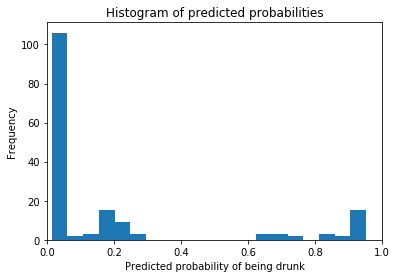

In [149]:
# create histogram of predictions
# store the predicted probabilities for class 1
y_pred_prob_gbc_split_dummy = gbc_split_dummy.predict_proba(X_test_split_dummy)[:, 1]

plt.hist(y_pred_prob_gbc_split_dummy, bins=20)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of being drunk')
plt.ylabel('Frequency')

In [150]:
# adjust classification threshold
from sklearn.preprocessing import Binarizer
# will return 1 for all values above 0.1 and 0 otherwise
# results are 2D so we slice out the first column
binarizer = Binarizer(threshold=0.1)
y_pred_binary_gbc_split_dummy = binarizer.fit_transform(y_pred_prob_gbc_split_dummy.reshape(-1, 1))

In [151]:
y_pred_binary_gbc_split_dummy[:15]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [152]:
print(confusion_matrix(y_test_split_dummy, y_pred_binary_gbc_split_dummy))

[[108  33]
 [  0  25]]


In [153]:
print(confusion_matrix(y_test_split_dummy, y_pred_gbc_split_dummy))

[[135   6]
 [  3  22]]


In [154]:
print(classification_report(y_test_split_dummy, y_pred_binary_gbc_split_dummy))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       141
           1       0.43      1.00      0.60        25

    accuracy                           0.80       166
   macro avg       0.72      0.88      0.73       166
weighted avg       0.91      0.80      0.83       166



In [155]:
print(classification_report(y_test_split_dummy, y_pred_gbc_split_dummy))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       141
           1       0.79      0.88      0.83        25

    accuracy                           0.95       166
   macro avg       0.88      0.92      0.90       166
weighted avg       0.95      0.95      0.95       166



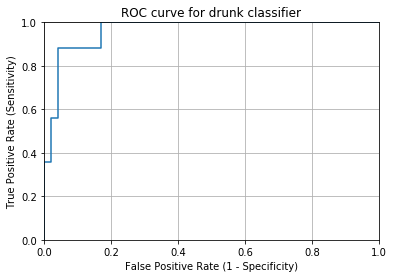

In [156]:
# create a histogram of predicted probabilities
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_split_dummy, y_pred_prob_gbc_split_dummy)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
#plt.rcParams['font.size'] = 12
plt.title('ROC curve for drunk classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [157]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [158]:
evaluate_threshold(0.7)

Sensitivity: 0.64
Specificity: 0.9574468085106383


In [159]:
evaluate_threshold(0.5)

Sensitivity: 0.88
Specificity: 0.9574468085106383


In [160]:
evaluate_threshold(0.3)

Sensitivity: 0.88
Specificity: 0.9574468085106383


In [161]:
evaluate_threshold(0.1)

Sensitivity: 1.0
Specificity: 0.7659574468085106


In [162]:
evaluate_threshold(0.05)

Sensitivity: 1.0
Specificity: 0.524822695035461


In [163]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_split_dummy, y_pred_prob_gbc_split_dummy)

0.9617021276595745

In [164]:
gbc_split_dummy.feature_importances_

array([0.23322088, 0.1878525 , 0.28103621, 0.02051049, 0.00896864,
       0.0109826 , 0.00304861, 0.03623006, 0.05124762, 0.05786384,
       0.0010893 , 0.0139769 , 0.00114178, 0.09283058])

In [165]:
from xgboost import XGBClassifier, plot_importance
xgbc = XGBClassifier()
xgbc.fit(X_train_split_dummy, y_train_split_dummy)
print('Training accuracy: {}'.format(xgbc.score(X_train_split_dummy, y_train_split_dummy)))
print('Test accuracy: {}'.format(xgbc.score(X_test_split_dummy, y_test_split_dummy)))

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Training accuracy: 1.0
Test accuracy: 0.9096385542168675


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


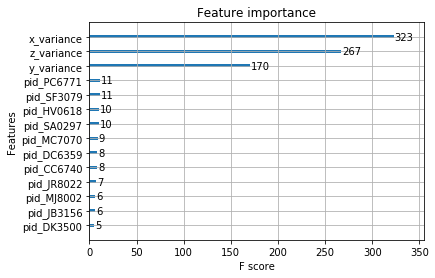

In [166]:
plot_importance(xgbc)
plt.show()

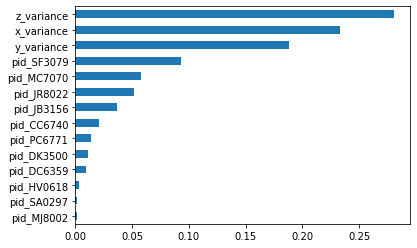

In [167]:
# examine feature importance
feat_importances = pd.Series(gbc_split_dummy.feature_importances_, index=X_train_split_dummy.columns)
feat_importances.sort_values().plot(kind='barh')

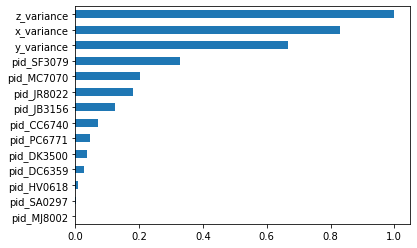

In [168]:
# minmax scale importances
minmax_feat_importances = MinMaxScaler().fit_transform(feat_importances.values.reshape(-1, 1))
pd.Series(minmax_feat_importances[:, 0], index = feat_importances.index).sort_values().plot(kind='barh')

In [169]:
X_test_split_dummy

x_variance  y_variance  z_variance  pid_CC6740  \
2017-05-03 06:58:08.409    0.006702    0.001285    0.017624           0   
2017-05-03 07:08:08.409    0.006702    0.001285    0.017624           0   
2017-05-03 07:18:08.409    0.006702    0.001285    0.017624           0   
2017-05-03 07:28:08.409    0.006860    0.001261    0.017845           0   
2017-05-03 07:38:08.409    0.006860    0.001261    0.017845           0   
...                             ...         ...         ...         ...   
2017-05-03 09:44:42.409    0.001838    0.001510    0.001484           0   
2017-05-03 09:54:42.409    0.001838    0.001510    0.001484           0   
2017-05-03 10:04:42.409    0.000977    0.001149    0.001136           0   
2017-05-03 10:14:42.409    0.000977    0.001149    0.001136           0   
2017-05-03 10:24:42.409    0.000977    0.001149    0.001136           0   

                         pid_DC6359  pid_DK3500  pid_HV0618  pid_JB3156  \
2017-05-03 06:58:08.409           0           0           0           0   
2017-05-03 07:08:08.409           0           0           0           0   
2017-05-03 07:18:08.409           0           0           0           0   
2017-05-03 07:28:08.409           0           0           0           0   
2017-05-03 07:38:08.409           0           0           0           0   
...                             ...         ...         ...         ...   
2017-05-03 09:44:42.409           0           0           0           0   
2017-05-03 09:54:42.409           0           0           0           0   
2017-05-03 10:04:42.409           0           0           0           0   
2017-05-03 10:14:42.409           0           0           0           0   
2017-05-03 10:24:42.409           0           0           0           0   

                         pid_JR8022  pid_MC7070  pid_MJ8002  pid_PC6771  \
2017-05-03 06:58:08.409           0           0           0           1   
2017-05-03 07:08:08.409           0           0           0           1   
2017-05-03 07:18:08.409           0           0           0           1   
2017-05-03 07:28:08.409           0           0           0           1   
2017-05-03 07:38:08.409           0           0           0           1   
...                             ...         ...         ...         ...   
2017-05-03 09:44:42.409           0           0           0           0   
2017-05-03 09:54:42.409           0           0           0           0   
2017-05-03 10:04:42.409           0           0           0           0   
2017-05-03 10:14:42.409           0           0           0           0   
2017-05-03 10:24:42.409           0           0           0           0   

                         pid_SA0297  pid_SF3079  
2017-05-03 06:58:08.409           0           0  
2017-05-03 07:08:08.409           0           0  
2017-05-03 07:18:08.409           0           0  
2017-05-03 07:28:08.409           0           0  
2017-05-03 07:38:08.409           0           0  
...                             ...         ...  
2017-05-03 09:44:42.409           1           0  
2017-05-03 09:54:42.409           1           0  
2017-05-03 10:04:42.409           1           0  
2017-05-03 10:14:42.409           1           0  
2017-05-03 10:24:42.409           1           0  

[166 rows x 14 columns]

In [170]:
X_test_split_dummy.loc[:, 'x_variance']

2017-05-03 06:58:08.409    0.006702
2017-05-03 07:08:08.409    0.006702
2017-05-03 07:18:08.409    0.006702
2017-05-03 07:28:08.409    0.006860
2017-05-03 07:38:08.409    0.006860
                             ...   
2017-05-03 09:44:42.409    0.001838
2017-05-03 09:54:42.409    0.001838
2017-05-03 10:04:42.409    0.000977
2017-05-03 10:14:42.409    0.000977
2017-05-03 10:24:42.409    0.000977
Name: x_variance, Length: 166, dtype: float64

In [171]:
prediction = gbc_split_dummy.predict(X_test_split_dummy)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [172]:
pd.DataFrame(prediction, columns=['drunk'])

drunk
0        0
1        0
2        0
3        0
4        0
..     ...
161      0
162      0
163      0
164      0
165      0

[166 rows x 1 columns]

In [173]:
y_test_split_dummy.drunk - prediction

2017-05-03 06:58:08.409    0
2017-05-03 07:08:08.409    0
2017-05-03 07:18:08.409    0
2017-05-03 07:28:08.409    0
2017-05-03 07:38:08.409    0
                          ..
2017-05-03 09:44:42.409    0
2017-05-03 09:54:42.409    0
2017-05-03 10:04:42.409    0
2017-05-03 10:14:42.409    0
2017-05-03 10:24:42.409    0
Name: drunk, Length: 166, dtype: int32

In [174]:
X_test_split_dummy.iloc[:, 0]

2017-05-03 06:58:08.409    0.006702
2017-05-03 07:08:08.409    0.006702
2017-05-03 07:18:08.409    0.006702
2017-05-03 07:28:08.409    0.006860
2017-05-03 07:38:08.409    0.006860
                             ...   
2017-05-03 09:44:42.409    0.001838
2017-05-03 09:54:42.409    0.001838
2017-05-03 10:04:42.409    0.000977
2017-05-03 10:14:42.409    0.000977
2017-05-03 10:24:42.409    0.000977
Name: x_variance, Length: 166, dtype: float64

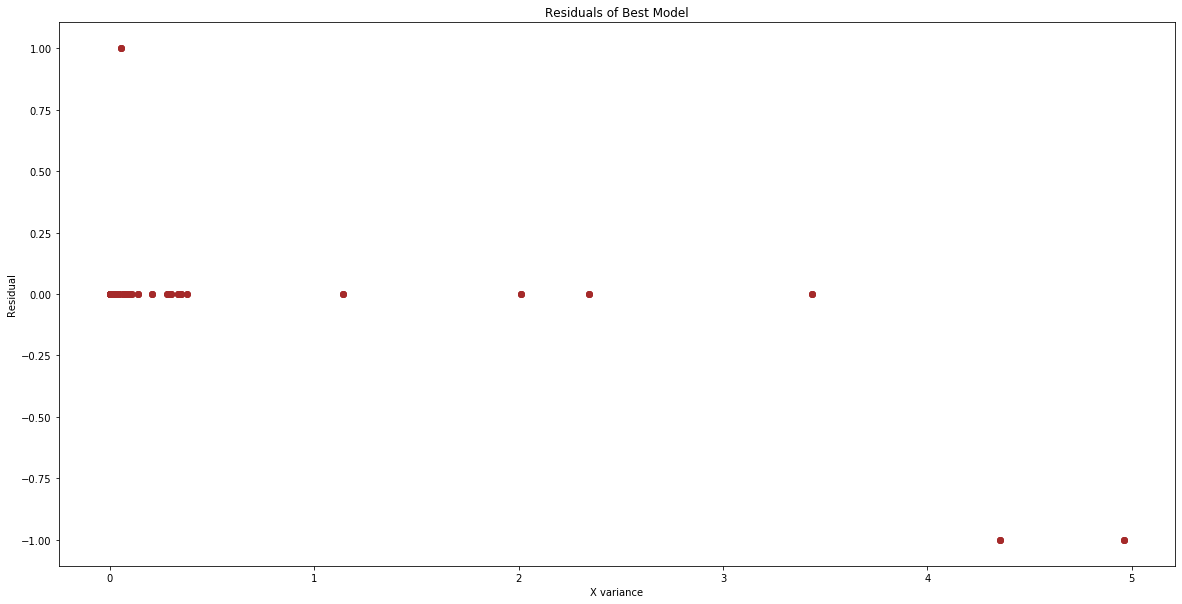

In [175]:
# check residuals graphically
plt.figure(figsize=(20, 10))
plt.title('Residuals of Best Model')
plt.scatter(X_test_split_dummy.iloc[:, 0], y_test_split_dummy.drunk - gbc_split_dummy.predict(X_test_split_dummy), color='brown')
#plt.xlim(-0.1, 0.4)
plt.xlabel('X variance')
plt.ylabel('Residual')
plt.show()

In [176]:
# check differences between android and iphone users
df_phones = pd.read_csv('phone_types.csv')
df_phones

pid phonetype
0   BK7610    iPhone
1   BU4707    iPhone
2   CC6740   Android
3   DC6359    iPhone
4   DK3500    iPhone
5   HV0618    iPhone
6   JB3156   Android
7   JR8022    iPhone
8   MC7070    iPhone
9   MJ8002    iPhone
10  PC6771    iPhone
11  SA0297    iPhone
12  SF3079    iPhone

In [177]:
# bootstrapping
droid_mask = (df.pid == 'CC6740') | (df.pid == 'JB3156')
x_var_droid = df[droid_mask].x_variance
x_var_iphone = df[~droid_mask].x_variance

In [193]:
print('Mean variance for android users: {}'.format(x_var_droid.mean()))
print('Mean variance for iPhone users: {}'.format(x_var_iphone.mean()))

Mean variance for android users: 1.3810873539033492
Mean variance for iPhone users: 0.0856634891629756


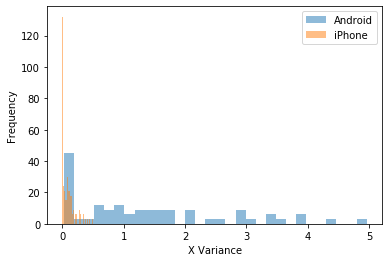

In [194]:
_ = plt.hist(x_var_droid, bins=30, alpha=0.5, label='Android')
_ = plt.hist(x_var_iphone, bins=30, alpha=0.5, label='iPhone')
_ = plt.xlabel('X Variance')
_ = plt.ylabel('Frequency')
_ = plt.legend()

In [179]:
mean_x_variance_phone = np.mean(np.concatenate((x_var_droid, x_var_iphone)))
x_var_droid_shift = x_var_droid - np.mean(x_var_droid) + mean_x_variance_phone
x_var_iphone_shift = x_var_iphone - np.mean(x_var_iphone) + mean_x_variance_phone

bs_x_droid_reps = draw_bs_reps(x_var_droid_shift, np.mean, N_rep)
bs_x_iphone_reps = draw_bs_reps(x_var_iphone_shift, np.mean, N_rep)
bs_reps_x_phone = bs_x_droid_reps - bs_x_iphone_reps

obs_diff_mean_x_phone = np.mean(x_var_droid) - np.mean(x_var_iphone)
p_x_phone = np.sum(bs_reps_x_phone >= obs_diff_mean_x_phone) / len(bs_reps_x_phone)
print('The p-value of the observed difference between groups is {}'.format(p_x_phone))

The p-value of the observed difference between groups is 0.0


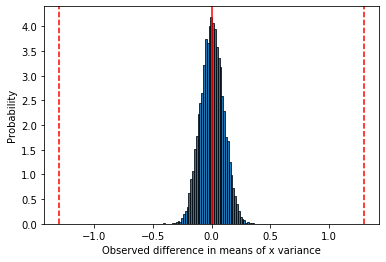

In [180]:
_ = plt.hist(bs_reps_x_phone, edgecolor='black', linewidth = 0.75, bins = 50, density=True)
_ = plt.xlabel('Observed difference in means of x variance')
_ = plt.ylabel('Probability')
_ = plt.axvline(bs_reps_x_phone.mean(), color='r')
_ = plt.axvline(obs_diff_mean_x_phone, color='r',linestyle='--')
_ = plt.axvline(-obs_diff_mean_x_phone, color='r',linestyle='--')
plt.show()

In [181]:
# examine variance again, throwing out one droid user
print('Mean sober variance is {}'.format(sober2['var'].mean()))
print('Mean drunk variance is {}'.format(drunk2['var'].mean()))

Mean sober variance is 0.2474696435891671
Mean drunk variance is 0.7823953881738225


In [182]:
df_exclude

x_variance  y_variance  z_variance  \
2017-05-02 14:58:08.409    0.052850    0.046527    0.081419   
2017-05-02 15:08:08.409    0.052850    0.046527    0.081419   
2017-05-02 15:18:08.409    0.052850    0.046527    0.081419   
2017-05-02 15:28:08.409    0.106928    0.093697    0.106555   
2017-05-02 15:38:08.409    0.106928    0.093697    0.106555   
...                             ...         ...         ...   
2017-05-03 02:43:16.712    0.285226    0.207372    0.237875   
2017-05-03 02:53:16.712    0.285226    0.207372    0.237875   
2017-05-03 03:03:16.712    0.072871    0.074005    0.077923   
2017-05-03 03:13:16.712    0.072871    0.074005    0.077923   
2017-05-03 03:23:16.712    0.072871    0.074005    0.077923   

                                       datetime  TAC_Reading     pid  drunk  \
2017-05-02 14:58:08.409 2017-05-02 14:58:08.409     0.069712  PC6771      0   
2017-05-02 15:08:08.409 2017-05-02 15:08:08.409     0.069712  PC6771      0   
2017-05-02 15:18:08.409 2017-05-02 15:18:08.409     0.069712  PC6771      0   
2017-05-02 15:28:08.409 2017-05-02 15:28:08.409     0.074726  PC6771      0   
2017-05-02 15:38:08.409 2017-05-02 15:38:08.409     0.074726  PC6771      0   
...                                         ...          ...     ...    ...   
2017-05-03 02:43:16.712 2017-05-03 02:43:16.712     0.104253  SF3079      1   
2017-05-03 02:53:16.712 2017-05-03 02:53:16.712     0.104253  SF3079      1   
2017-05-03 03:03:16.712 2017-05-03 03:03:16.712     0.135561  SF3079      1   
2017-05-03 03:13:16.712 2017-05-03 03:13:16.712     0.135561  SF3079      1   
2017-05-03 03:23:16.712 2017-05-03 03:23:16.712     0.135561  SF3079      1   

                              var  
2017-05-02 14:58:08.409  0.107643  
2017-05-02 15:08:08.409  0.107643  
2017-05-02 15:18:08.409  0.107643  
2017-05-02 15:28:08.409  0.177670  
2017-05-02 15:38:08.409  0.177670  
...                           ...  
2017-05-03 02:43:16.712  0.425372  
2017-05-03 02:53:16.712  0.425372  
2017-05-03 03:03:16.712  0.129842  
2017-05-03 03:13:16.712  0.129842  
2017-05-03 03:23:16.712  0.129842  

[465 rows x 8 columns]

In [183]:
# train model with excluded data
train_list_exclude = []
test_list_exclude = []
for pid in set(df_exclude.pid.values):
    df_pid = df_exclude[df_exclude.pid == pid]
    train = df_pid[:int(df_pid.shape[0]*0.7)]
    test = df_pid[int(df_pid.shape[0]*0.7):]
    
    train_list_exclude.append(train)
    test_list_exclude.append(test)
    
df_train_exclude = pd.concat(train_list_exclude)
df_test_exclude = pd.concat(test_list_exclude)

In [184]:
target = ['drunk']
dummy = ['pid']
feature = ['x_variance', 'y_variance', 'z_variance']
Xy_train_dummy_exclude = df_train_exclude[target + feature + dummy]
Xy_test_dummy_exclude = df_test_exclude[target + feature + dummy]
df_dum_train_exclude = pd.get_dummies(Xy_train_dummy_exclude, columns=dummy, drop_first=True)
df_dum_test_exclude = pd.get_dummies(Xy_test_dummy_exclude, columns=dummy, drop_first=True)
features = [c for c in df_dum_train_exclude.columns if c not in target]
X_train_split_dummy_exclude, y_train_split_dummy_exclude = df_dum_train_exclude[features], df_dum_train_exclude[target]
X_test_split_dummy_exclude, y_test_split_dummy_exclude = df_dum_test_exclude[features], df_dum_test_exclude[target]

In [185]:
gbc_split_dummy_exclude = GradientBoostingClassifier()
gbc_split_dummy_exclude.fit(X_train_split_dummy_exclude, y_train_split_dummy_exclude)
print('Training accuracy: {}'.format(gbc_split_dummy_exclude.score(X_train_split_dummy_exclude, y_train_split_dummy_exclude)))
print('Test accuracy: {}'.format(gbc_split_dummy_exclude.score(X_test_split_dummy_exclude, y_test_split_dummy_exclude)))
print('F1_score: {}'.format(f1_score(y_test_split_dummy_exclude, gbc_split_dummy_exclude.predict(X_test_split_dummy_exclude))))

Training accuracy: 1.0
Test accuracy: 0.9793103448275862
F1_score: 0.9361702127659575


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [186]:
model_40 = {'model_name' : 'Gradient Boosting Classifier, new split, dummies, exclude user', 
           'features' : 'variance, pid dummies',
           'training_accuracy' : gbc_split_dummy_exclude.score(X_train_split_dummy_exclude, y_train_split_dummy_exclude),
           'test_accuracy' : gbc_split_dummy_exclude.score(X_test_split_dummy_exclude, y_test_split_dummy_exclude),
            'f1_score' : f1_score(y_test_split_dummy_exclude, gbc_split_dummy_exclude.predict(X_test_split_dummy_exclude))}
dict_list.append(model_40)

In [187]:
model_table_6 = pd.DataFrame(dict_list)
model_table_6.sort_values('f1_score', ascending=False)

model_name  \
30               Gradient Boost Classifier, new split   
28                Random Forest Classifier, new split   
29       Random Forest Classifier, new split, dummies   
35  Logistic Regression, MinMax Scaler, new split,...   
33  Logistic Regression, Standard Scaler, new spli...   
32    Logistic Regression, Standard Scaler, new split   
31      Gradient Boost Classifier, new split, dummies   
39  Gradient Boosting Classifier, new split, dummi...   
34      Logistic Regression, MinMax Scaler, new split   
17       Random Forest Classifier, new split, dummies   
19      Gradient Boost Classifier, new split, dummies   
38  Gradient Boosting Classifier, new split, MinMa...   
37  Gradient Boosting Classifier, new split, Stand...   
36  Gradient Boosting Classifier, new split, tuned...   
21  Logistic Regression, Standard Scaler, new spli...   
25            Logistic Regression, new split, dummies   
13            Logistic Regression, new split, dummies   
16                Random Forest Classifier, new split   
5               Random Forest Classifier with dummies   
6                           Gradient Boost Classifier   
4                            Random Forest Classifier   
23  Logistic Regression, MinMax Scaler, new split,...   
18               Gradient Boost Classifier, new split   
24                     Logistic Regression, new split   
7              Gradient Boost Classifier with dummies   
27                 SVM Classifier, new split, dummies   
0                                 Logistic Regression   
26                          SVM Classifier, new split   
22      Logistic Regression, MinMax Scaler, new split   
1            Logistic Regression with dummy variables   
15                 SVM Classifier, new split, dummies   
14                          SVM Classifier, new split   
12                     Logistic Regression, new split   
11    Logistic Regression with MinMax Scaler, dummies   
10             Logistic Regression with MinMax Scaler   
9   Logistic Regression with Standard Scaler, dummies   
8            Logistic Regression with Standard Scaler   
3                         SVM classifier with dummies   
2                                      SVM classifier   
20    Logistic Regression, Standard Scaler, new split   

                              features  training_accuracy  test_accuracy  \
30               variance, TAC_Reading           1.000000       1.000000   
28               variance, TAC_Reading           1.000000       1.000000   
29  variance, TAC_Reading, pid dummies           1.000000       1.000000   
35  variance, TAC_Reading, pid dummies           0.934783       1.000000   
33  variance, TAC_Reading, pid dummies           0.983696       1.000000   
32               variance, TAC_Reading           0.983696       1.000000   
31  variance, TAC_Reading, pid dummies           1.000000       1.000000   
39               variance, pid dummies           1.000000       0.979310   
34               variance, TAC_Reading           0.902174       0.981928   
17               variance, pid dummies           1.000000       0.945783   
19               variance, pid dummies           1.000000       0.945783   
38               variance, pid dummies           0.959239       0.927711   
37               variance, pid dummies           0.975543       0.927711   
36               variance, pid dummies           0.972826       0.933735   
21               variance, pid dummies           0.771739       0.891566   
25  variance, TAC_Reading, pid dummies           0.817935       0.879518   
13               variance, pid dummies           0.766304       0.867470   
16                            variance           1.000000       0.873494   
5                variance, pid dummies           1.000000       0.683230   
6                             variance           1.000000       0.645963   
4                             variance           1.000000       0.664596   
23               variance, pid du

In [189]:
# filter out models that used TAC
model_table_7 = model_table_6[~model_table_6['features'].str.contains("TAC_Reading")]
model_table_7.sort_values('f1_score', ascending=False)

model_name               features  \
39  Gradient Boosting Classifier, new split, dummi...  variance, pid dummies   
17       Random Forest Classifier, new split, dummies  variance, pid dummies   
19      Gradient Boost Classifier, new split, dummies  variance, pid dummies   
38  Gradient Boosting Classifier, new split, MinMa...  variance, pid dummies   
37  Gradient Boosting Classifier, new split, Stand...  variance, pid dummies   
36  Gradient Boosting Classifier, new split, tuned...  variance, pid dummies   
21  Logistic Regression, Standard Scaler, new spli...  variance, pid dummies   
13            Logistic Regression, new split, dummies  variance, pid dummies   
16                Random Forest Classifier, new split               variance   
5               Random Forest Classifier with dummies  variance, pid dummies   
6                           Gradient Boost Classifier               variance   
4                            Random Forest Classifier               variance   
23  Logistic Regression, MinMax Scaler, new split,...  variance, pid dummies   
18               Gradient Boost Classifier, new split               variance   
7              Gradient Boost Classifier with dummies  variance, pid dummies   
22      Logistic Regression, MinMax Scaler, new split               variance   
20    Logistic Regression, Standard Scaler, new split               variance   
0                                 Logistic Regression               variance   
15                 SVM Classifier, new split, dummies  variance, pid dummies   
1            Logistic Regression with dummy variables  variance, pid dummies   
12                     Logistic Regression, new split               variance   
11    Logistic Regression with MinMax Scaler, dummies  variance, pid dummies   
10             Logistic Regression with MinMax Scaler               variance   
9   Logistic Regression with Standard Scaler, dummies  variance, pid dummies   
8            Logistic Regression with Standard Scaler               variance   
3                         SVM classifier with dummies  variance, pid dummies   
2                                      SVM classifier               variance   
14                          SVM Classifier, new split               variance   

    training_accuracy  test_accuracy  f1_score  \
39           1.000000       0.979310  0.936170   
17           1.000000       0.945783  0.847458   
19           1.000000       0.945783  0.830189   
38           0.959239       0.927711  0.785714   
37           0.975543       0.927711  0.785714   
36           0.972826       0.933735  0.784314   
21           0.771739       0.891566  0.689655   
13           0.766304       0.867470  0.645161   
16           1.000000       0.873494  0.644068   
5            1.000000       0.683230  0.540541   
6            1.000000       0.645963  0.536585   
4            1.000000       0.664596  0.526316   
23           0.750000       0.759036  0.500000   
18           1.000000       0.765060  0.400000   
7            1.000000       0.571429  0.206897   
22           0.627717       0.777108  0.000000   
20           0.627717       0.759036  0.000000   
0            0.734584       0.590062  0.000000   
15           0.611413       0.849398  0.000000   
1            0.782842       0.590062  0.000000   
12           0.627717       0.795181  0.000000   
11           0.766756       0.590062  0.000000   
10           0.726542       0.590062  0.000000   
9            0.766756       0.590062  0.000000   
8            0.710456       0.590062  0.000000   
3            0.726542       0.590062  0.000000   
2            0.726542       0.590062  0.000000   
14           0.611413       0.849398  0.000000   

                                      hyperparameters  
39                                                NaN  
17                                                NaN  
19                                                NaN  
38                                             